# Verkehrsunfallanalyse

Für unser Python-Datenprojekt nutzen wir einen Datensatz von opendata.swiss, der detaillierte Informationen zu Straßenverkehrsunfällen mit Personenschaden in der Schweiz enthält. Dieser Datensatz umfasst eine Vielzahl an Merkmalen wie Unfalltyp, Beteiligte, Straßenart, geografische Lage sowie Zeitpunkt und Schweregrad des Unfalls. 


Die Vorhersage des Schweregrades von Verkehrsunfällen ist eine komplexe Aufgabe, da zahlreiche Faktoren das Unfallgeschehen beeinflussen. Bisherige Ansätze zur Unfallanalyse sind oft deskriptiv und fokussieren auf vergangene Ereignisse. Es fehlt jedoch ein Modell, das auf Basis historischer Daten präzise Vorhersagen über die Schwere zukünftiger Unfälle machen kann. Dies ist besonders relevant, um präventive Massnahmen und gezielte Verbesserungen in der Verkehrssicherheit zu fördern.

Das Ziel unseres Projekts ist daher die Entwicklung eines Modells, das den Schweregrad von Unfällen vorhersagen kann, durch die Klassifikation in leichte, schwere und tödliche Verletzungen. Gleichzeitig möchten wir die entscheidenden Einflussfaktoren identifizieren, um auf Basis dieser Erkenntnisse konkrete Präventionsstrategien für risikobehaftete Verkehrssituationen ableiten zu können.

Unsere zentrale Fragestellung lautet: Wie genau kann die Schwere von Verkehrsunfällen anhand historischer Daten vorhergesagt werden, und welche Faktoren tragen am meisten zur Vorhersage bei?

Wir beginnen mit einer Explorativen Datenanalyse (EDA), um grundlegende Muster in den Daten zu erkennen. Darauf folgen Datenbereinigung und -transformation, um etwaige Lücken und Inkonsistenzen zu beheben. Anschließend identifizieren wir durch Feature Selection & Engineering die wichtigsten Merkmale für die Modellierung. Mehrere Modelle werden trainiert und valuiert, bevor sie abschließend mit Explainable AI (XAI) analysiert werden, um die Entscheidungsgrundlagen des Modells zu verstehen und fundierte Einblicke in die Hauptfaktoren zur Unfallvorhersage zu gewinnen.

## Exploritative Datenanalyse (EDA) 
Bei der explorativen Datenanalyse (EDA) werden Grafiken und Visualisierungen eingesetzt, um einen Datensatz zu untersuchen und zu analysieren. 

Daten beschreiben, Identifizierung und Verstehen von Beziehungen und Gruppen, Hypothesentest.

#### Daten importieren

Als erstes importieren wir die Daten aus unserem Datensatz, welchen wir von https://opendata.swiss/de/dataset/strassenverkehrsunfalle-mit-personenschaden heruntergeladen haben.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [3]:
df_original = pd.read_csv("data/RoadTrafficAccidentLocations.csv", sep=",", low_memory=False)
# df_original = df_original.drop(df_original.columns[0], axis=1)

# Erste fünf Zeilen des Datensatzes anzeigen
df_original.head()

,AccidentUID,AccidentType,AccidentType_de,AccidentType_fr,AccidentType_it,AccidentType_en,AccidentSeverityCategory,AccidentSeverityCategory_de,AccidentSeverityCategory_fr,AccidentSeverityCategory_it,...,AccidentMonth_fr,AccidentMonth_it,AccidentMonth_en,AccidentWeekDay,AccidentWeekDay_de,AccidentWeekDay_fr,AccidentWeekDay_it,AccidentWeekDay_en,AccidentHour,AccidentHour_text
0,B3ECE649BB1A004CE0430A839427004C,at2,Auffahrunfall,accident par tamponnement,Incidente di tamponamento,Accident with rear-end collision,as3,Unfall mit Leichtverletzten,accident avec blessés légers,Incidente con feriti leggeri,...,janvier,Gennaio,January,aw403,Mittwoch,mercredi,Mercoledì,Wednesday,16.0,16h-17h
1,B3ECEDCC96700122E0430A8394270122,at0,Schleuder- oder Selbstunfall,dérapage ou perte de maîtrise,Incidente di sbandamento o per colpa propria,Accident with skidding or self-accident,as3,Unfall mit Leichtverletzten,accident avec blessés légers,Incidente con feriti leggeri,...,janvier,Gennaio,January,aw404,Donnerstag,jeudi,Giovedì,Thursday,0.0,00h-01h
2,B3F45973E4C80028E0430A8394270028,at1,Überholunfall oder Fahrstreifenwechsel,accident lors d'un dépassement ou lors d'un ch...,Incidente di sorpasso o al cambiamento di corsia,Accident when overtaking or changing lanes,as3,Unfall mit Leichtverletzten,accident avec blessés légers,Incidente con feriti leggeri,...,janvier,Gennaio,January,aw402,Dienstag,mardi,Martedì,Tuesday,11.0,11h-12h
3,B3F45974108E0028E0430A8394270028,at8,Fussgängerunfall,accident impliquant des piétons,Incidente con pedoni,Accident involving pedestrian(s),as3,Unfall mit Leichtverletzten,accident avec blessés légers,Incidente con feriti leggeri,...,janvier,Gennaio,January,aw401,Montag,lundi,Lunedí,Monday,11.0,11h-12h
4,B3F60AA67758013EE0430A839427013E,at4,Einbiegeunfall,accident en s'engageant sur une route,Incidente nell’immettersi in una strada,Accident when turning-into main road,as2,Unfall mit Schwerverletzten,accident avec blessés graves,Incidente con feriti gravi,...,janvier,Gennaio,January,aw401,Montag,lundi,Lunedí,Monday,8.0,08h-09h


#### Überblick über die Datenstruktur

Nun verschaffen wir und einen Überblick über die Datensturktur der verschiedenen Informationen in unserem Datensatz. Das verschafft uns einen ersten groben Überblick.

In [4]:
# Überblick über die Anzahl der Zeilen und Spalten, Datentypen und fehlende Werte
data_overview = {
    "Anzahl der Zeilen": df_original.shape[0],
    "Anzahl der Spalten": df_original.shape[1],
    "Datentypen": df_original.dtypes,
    "Fehlende Werte": df_original.isnull().sum()
}
print("Datenübersicht:", data_overview)

Datenübersicht: {'Anzahl der Zeilen': 232303, 'Anzahl der Spalten': 36, 'Datentypen': AccidentUID                     object
AccidentType                    object
AccidentType_de                 object
AccidentType_fr                 object
AccidentType_it                 object
AccidentType_en                 object
AccidentSeverityCategory        object
AccidentSeverityCategory_de     object
AccidentSeverityCategory_fr     object
AccidentSeverityCategory_it     object
AccidentSeverityCategory_en     object
AccidentInvolvingPedestrian       bool
AccidentInvolvingBicycle          bool
AccidentInvolvingMotorcycle       bool
RoadType                        object
RoadType_de                     object
RoadType_fr                     object
RoadType_it                     object
RoadType_en                     object
AccidentLocation_CHLV95_E        int64
AccidentLocation_CHLV95_N        int64
CantonCode                      object
MunicipalityCode                 int64
AccidentYear     

Interpretation: 
Der Datensatz enthält insgesamt 232.303 Zeilen und 35 Spalten. 
Die Datentypen umfassen hauptsächlich Objekttypen (für Texte und Kategorien), einige Boolesche Variablen und numerische Typen wie int64 und float64. 
Die Spalte AccidentHour und AccidentHour_text haben jeweils 5 fehlende Werte, während alle anderen Spalten vollständig sind, also keine fehlenden Werte aufweisen. 
Diese hohe Datenintegrität erleichtert die Analyse und reduziert den Aufwand für die Datenbereinigung.

#### Visualisierung der Verteilung von kategorialen Variabeln

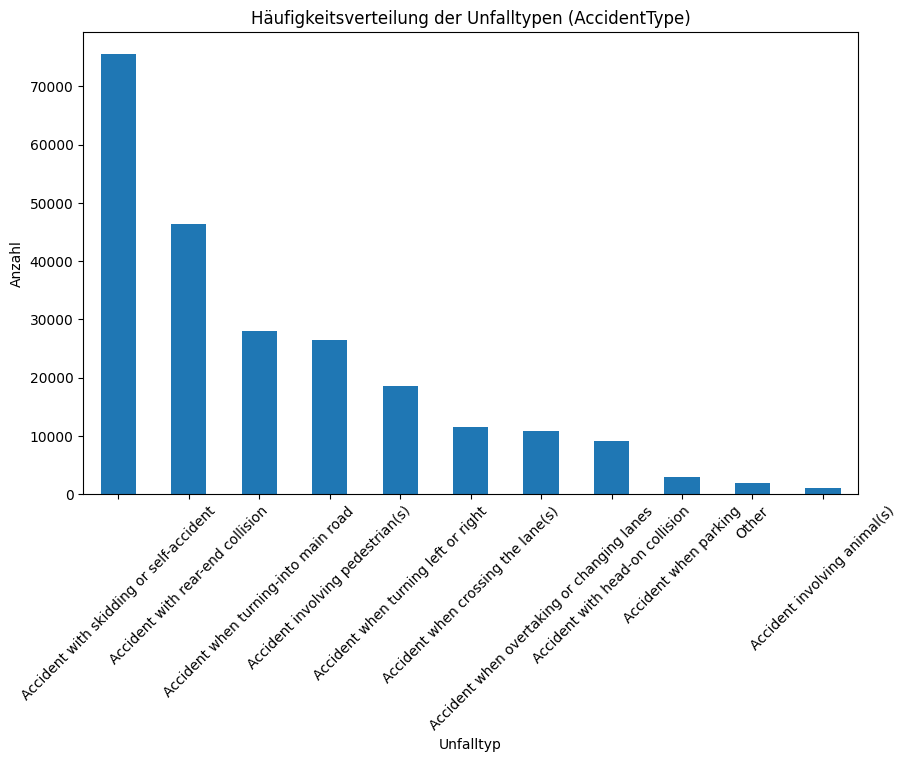

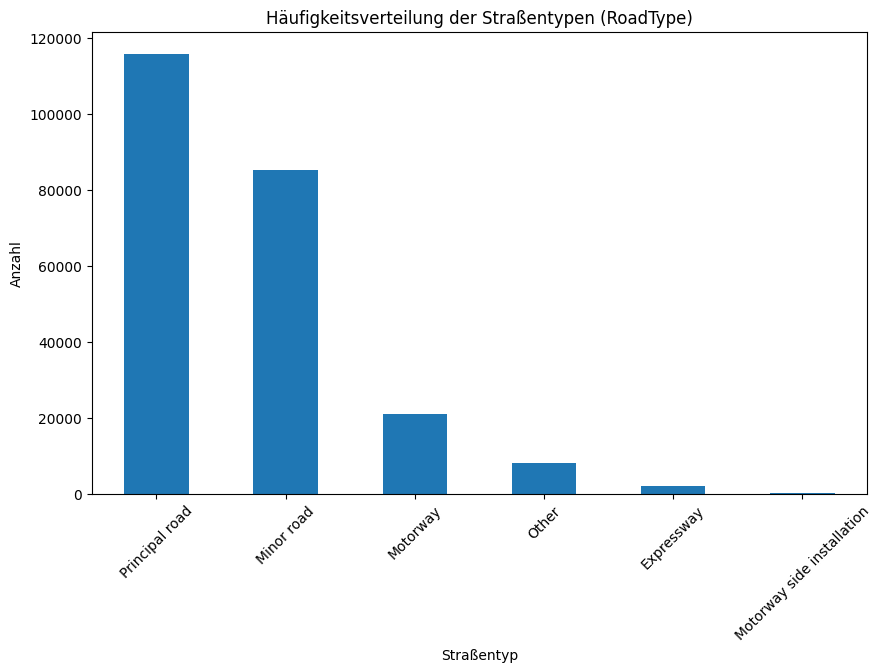

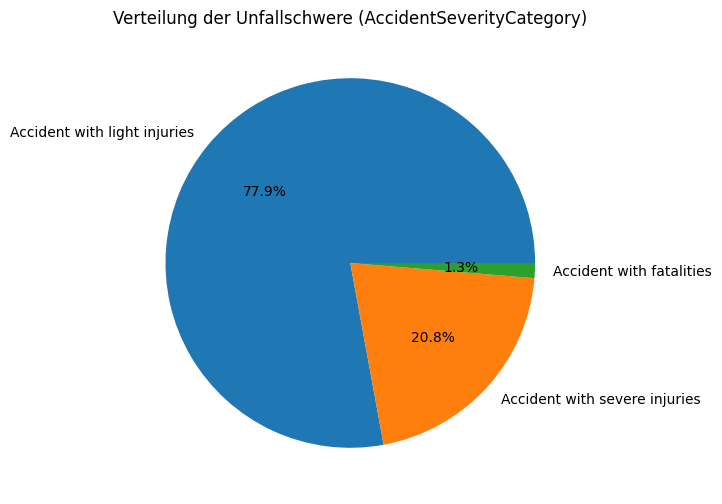

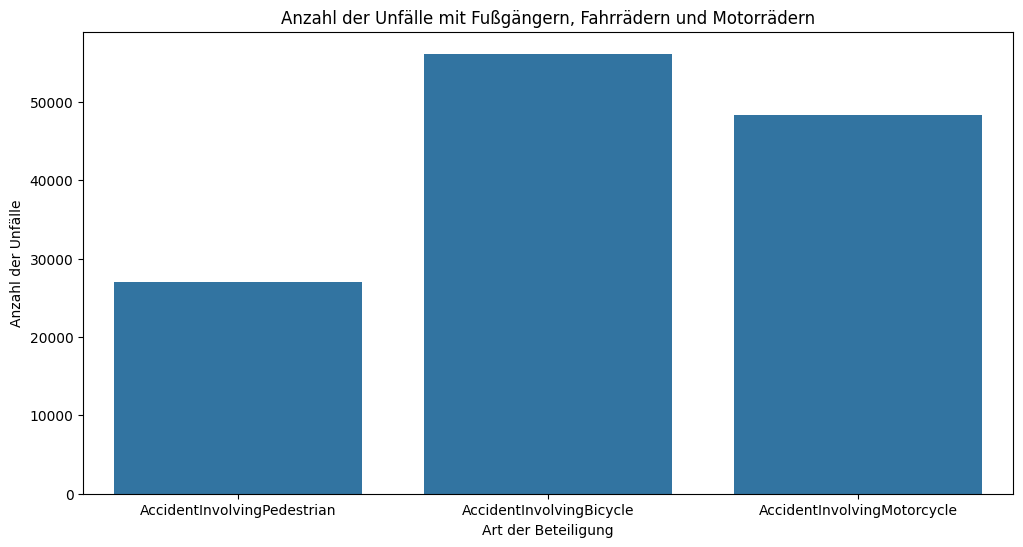

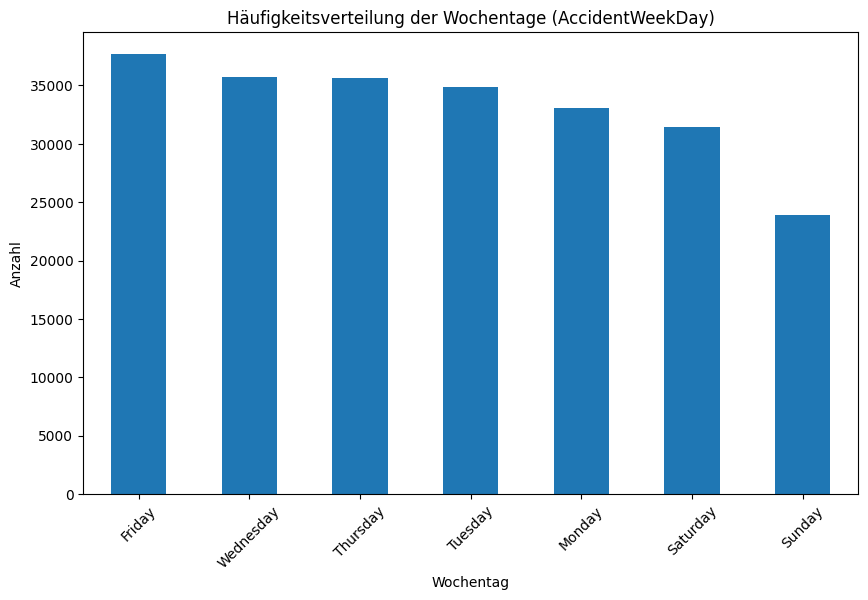

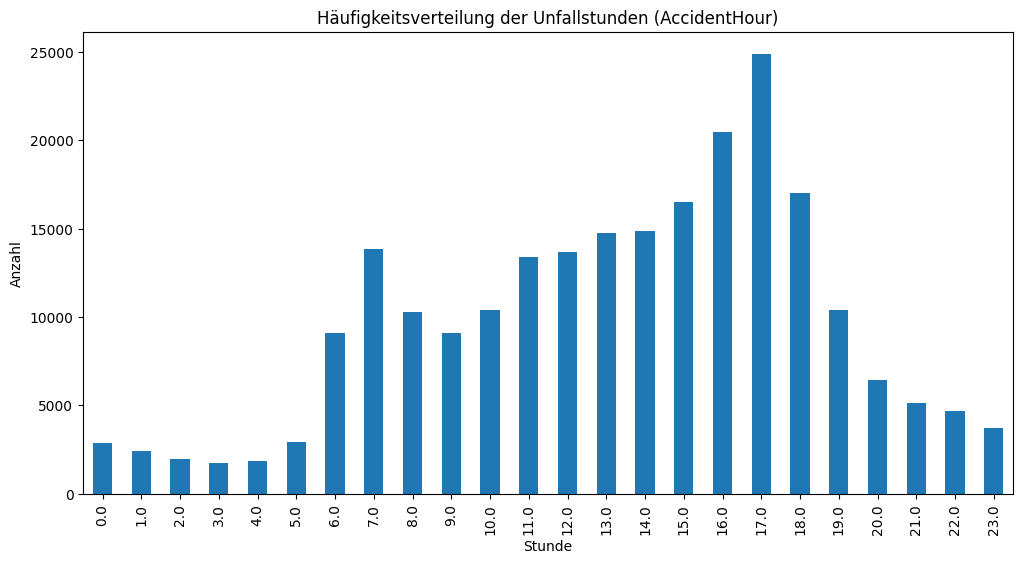

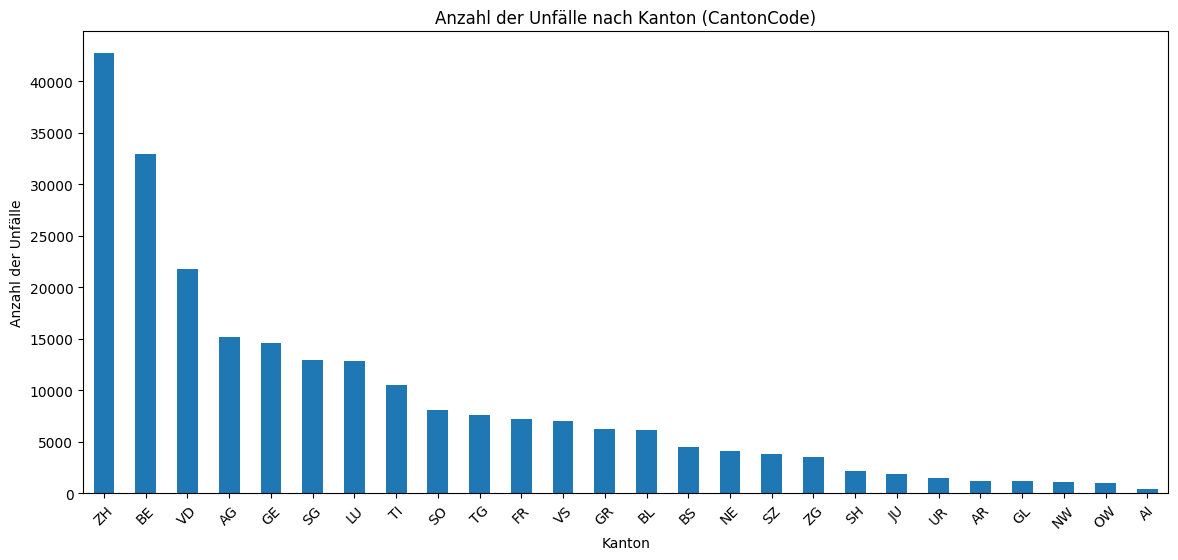

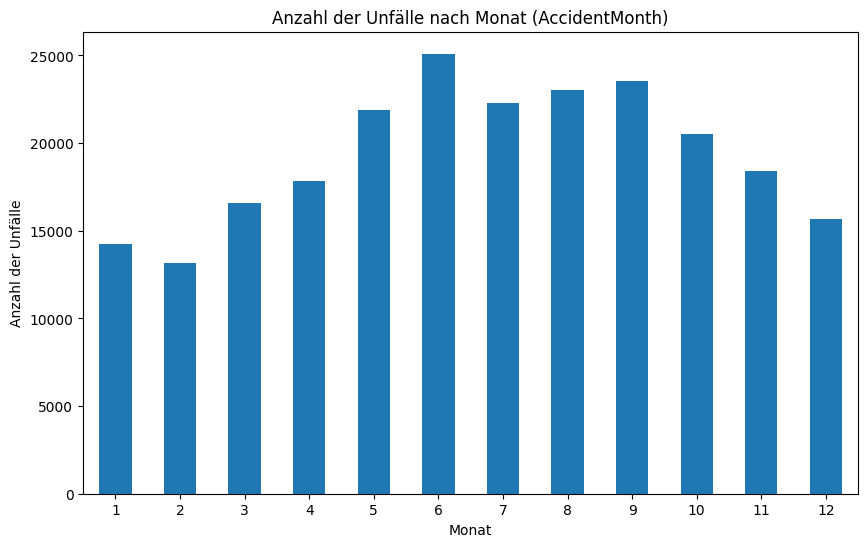

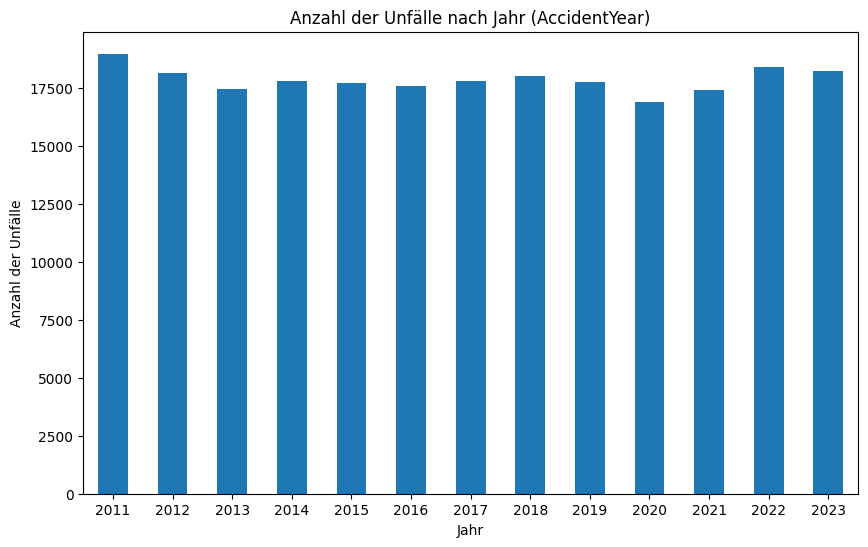

In [5]:
# Unfalltypen (AccidentType)
plt.figure(figsize=(10, 6))
df_original['AccidentType_en'].value_counts().plot(kind='bar')
plt.title('Häufigkeitsverteilung der Unfalltypen (AccidentType)')
plt.xlabel('Unfalltyp')
plt.ylabel('Anzahl')
plt.xticks(rotation=45)
plt.show()

# Strassentyp (RoadType)
plt.figure(figsize=(10, 6))
df_original['RoadType_en'].value_counts().plot(kind='bar')
plt.title('Häufigkeitsverteilung der Straßentypen (RoadType)')
plt.xlabel('Straßentyp')
plt.ylabel('Anzahl')
plt.xticks(rotation=45)
plt.show()

# Unfallschwere (AccidentSeverityCategory)
plt.figure(figsize=(6, 6))
df_original['AccidentSeverityCategory_en'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Verteilung der Unfallschwere (AccidentSeverityCategory)')
plt.ylabel('')
plt.show()

# Gruppierte Balkendiagramme für die Beteiligung von Fußgängern, Fahrrädern und Motorrädern nach Unfallschwere
plt.figure(figsize=(12, 6))
data_melted = df_original.melt(value_vars=['AccidentInvolvingPedestrian', 'AccidentInvolvingBicycle', 'AccidentInvolvingMotorcycle'], 
                        var_name='Unfallbeteiligung', value_name='Beteiligt')

sns.countplot(data=data_melted[data_melted['Beteiligt']], x='Unfallbeteiligung')
plt.title('Anzahl der Unfälle mit Fußgängern, Fahrrädern und Motorrädern')
plt.xlabel('Art der Beteiligung')
plt.ylabel('Anzahl der Unfälle')
plt.show()

# Wochentag des Unfalls (AccidentWeekDay)
plt.figure(figsize=(10, 6))
df_original['AccidentWeekDay_en'].value_counts().plot(kind='bar')
plt.title('Häufigkeitsverteilung der Wochentage (AccidentWeekDay)')
plt.xlabel('Wochentag')
plt.ylabel('Anzahl')
plt.xticks(rotation=45)
plt.show()

# Unfallstunde (AccidentHour)
plt.figure(figsize=(12, 6))
df_original['AccidentHour'].value_counts().sort_index().plot(kind='bar')
plt.title('Häufigkeitsverteilung der Unfallstunden (AccidentHour)')
plt.xlabel('Stunde')
plt.ylabel('Anzahl')
plt.show()

# Verteilung nach Kanton (CantonCode)
plt.figure(figsize=(14, 6))
df_original['CantonCode'].value_counts().plot(kind='bar')
plt.title('Anzahl der Unfälle nach Kanton (CantonCode)')
plt.xlabel('Kanton')
plt.ylabel('Anzahl der Unfälle')
plt.xticks(rotation=45)
plt.show()

# Verteilung nach Monat (AccidentMonth)
plt.figure(figsize=(10, 6))
df_original['AccidentMonth'].value_counts().sort_index().plot(kind='bar')
plt.title('Anzahl der Unfälle nach Monat (AccidentMonth)')
plt.xlabel('Monat')
plt.ylabel('Anzahl der Unfälle')
plt.xticks(rotation=0)
plt.show()

# Verteilung nach Jahr (AccidentYear)
plt.figure(figsize=(10, 6))
df_original['AccidentYear'].value_counts().sort_index().plot(kind='bar')
plt.title('Anzahl der Unfälle nach Jahr (AccidentYear)')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Unfälle')
plt.xticks(rotation=0)
plt.show()

Interpretation aller Visualisierungen: 

Unfalltypen (AccidentType): Die häufigsten Unfalltypen sind „Schleuder- oder Selbstunfälle“ und „Auffahrunfälle“. Dies deutet darauf hin, dass Selbstkontrollverluste und Auffahrunfälle besonders häufig vorkommen, was auf schlechte Wetterbedingungen, Unaufmerksamkeit oder zu geringen Abstand im Verkehr hinweisen könnte.

Straßentypen (RoadType): Die meisten Unfälle ereignen sich auf Hauptstrassen und Nebenstrassen, während Autobahnen deutlich weniger Unfälle aufweisen. Dies könnte daran liegen, dass Haupt- und Nebenstrassen stärker befahren sind und unterschiedliche Verkehrsbedingungen aufweisen, wie z. B. Kreuzungen und Fussgängerüberwege.

Unfallschwere (AccidentSeverityCategory): Die meisten Unfälle führen zu leichten Verletzungen (77,9%), gefolgt von Unfällen mit schweren Verletzungen (20,8%) und nur einem kleinen Anteil an tödlichen Unfällen (1,3%). Diese Verteilung könnte darauf hindeuten, dass die meisten Unfälle eher geringfügig sind und auf moderat befahrenen Strassen oder niedrigen Geschwindigkeiten auftreten.

Unfälle mit spezifischer Beteiligung (Fußgänger, Fahrräder, Motorräder): Unfälle mit Fahrrädern und Motorrädern sind häufiger als solche mit Fussgängern. Dies könnte auf die größere Verwundbarkeit und das häufigere Auftreten von Fahrrädern und Motorrädern im Strassenverkehr hindeuten.

Wochentag der Unfälle (AccidentWeekDay): Unfälle treten an Wochentagen relativ gleichmäßig auf, mit einem leichten Anstieg am Freitag und einem deutlichen Rückgang am Sonntag. Das könnte auf eine erhöhte Mobilität an Wochentagen und möglicherweise vermehrte Freizeitaktivitäten am Freitagabend hinweisen.

Unfallzeit (AccidentHour): Die Anzahl der Unfälle ist morgens (insbesondere um 7 Uhr) und am späten Nachmittag (17 Uhr) am höchsten. Dies könnte mit den Pendelzeiten zusammenhängen, wenn das Verkehrsaufkommen am höchsten ist.

Unfälle nach Kanton (CantonCode): Die Kantone Zürich und Bern weisen die höchsten Unfallzahlen auf, gefolgt von Waadt und Aargau. Dies könnte daran liegen, dass diese Kantone bevölkerungsreicher sind und höhere Verkehrsaufkommen haben.

Monatliche Verteilung der Unfälle (AccidentMonth): Die Unfälle sind im Sommermonat Juni am höchsten, was auf erhöhte Aktivitäten und Reisemobilität im Sommer hinweisen könnte. Die niedrigsten Unfallzahlen finden sich in den Wintermonaten, möglicherweise wegen geringerer Mobilität oder vorsichtigerem Fahren bei schlechten Wetterbedingungen.

Jährliche Verteilung der Unfälle (AccidentYear): Die Unfallzahlen sind über die Jahre relativ konstant geblieben, was auf stabile Verkehrsbedingungen und Sicherheitsvorkehrungen hinweisen könnte, ohne signifikante Ab- oder Zunahme in der Unfallhäufigkeit.

#### Untersuchung von Beziehungen zwischen Merkmalen

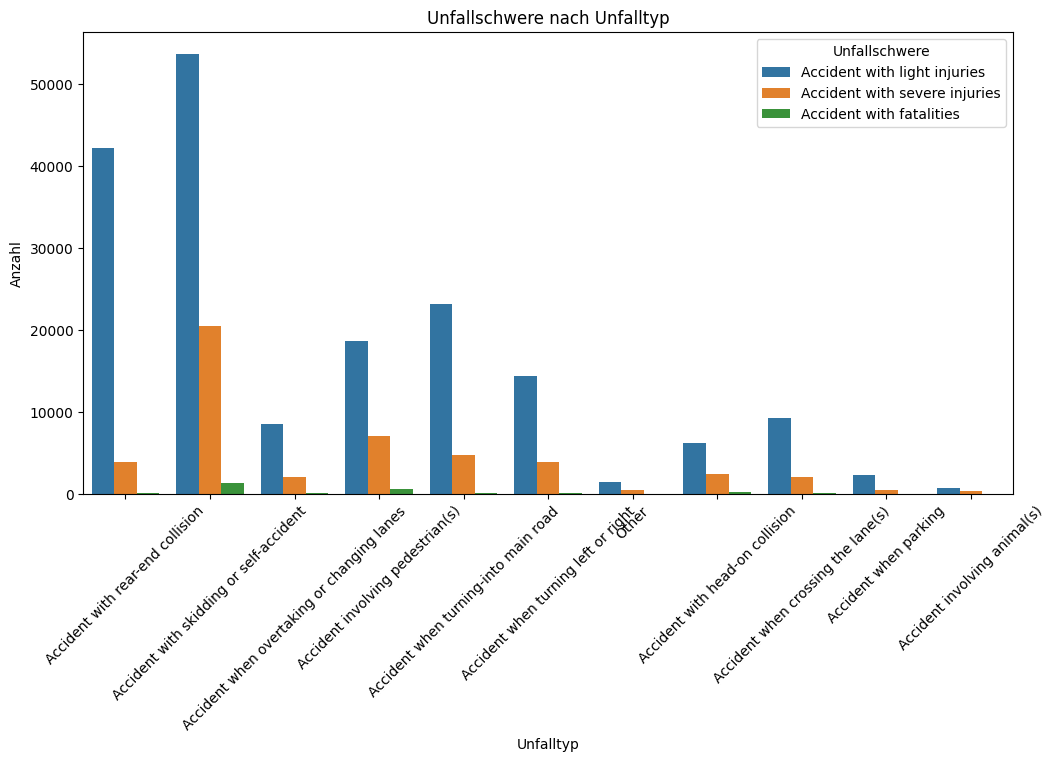

In [6]:
# Unfalltyp und Schweregrad
plt.figure(figsize=(12, 6))
sns.countplot(data=df_original, x='AccidentType_en', hue='AccidentSeverityCategory_en')
plt.title('Unfallschwere nach Unfalltyp')
plt.xlabel('Unfalltyp')
plt.ylabel('Anzahl')
plt.xticks(rotation=45)
plt.legend(title='Unfallschwere')
plt.show()

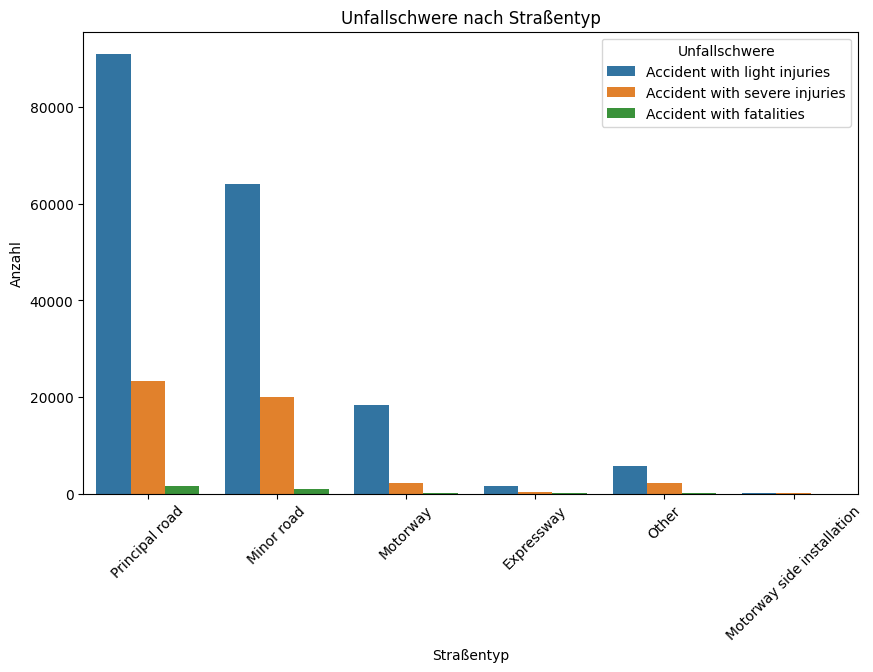

In [7]:
# Strassentyp und Schweregrad
plt.figure(figsize=(10, 6))
sns.countplot(data=df_original, x='RoadType_en', hue='AccidentSeverityCategory_en')
plt.title('Unfallschwere nach Straßentyp')
plt.xlabel('Straßentyp')
plt.ylabel('Anzahl')
plt.xticks(rotation=45)
plt.legend(title='Unfallschwere')
plt.show()


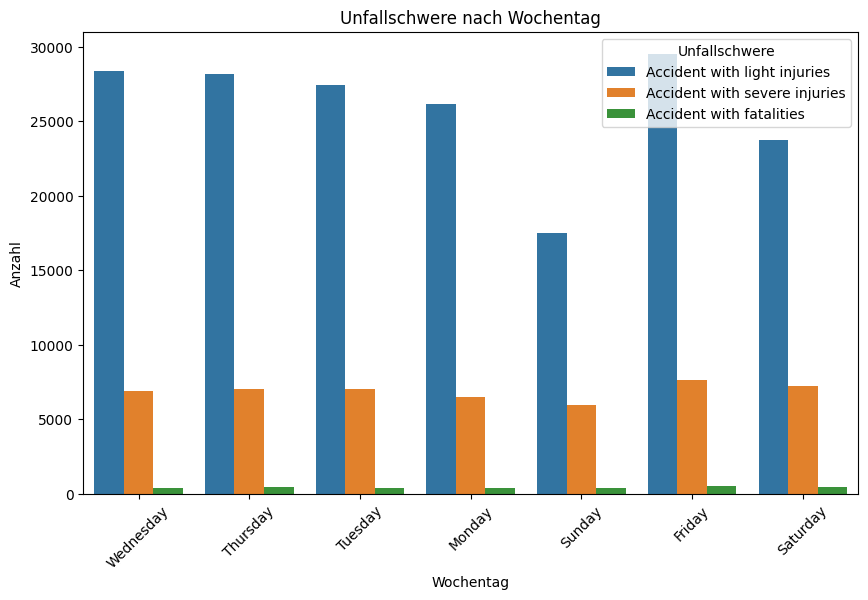

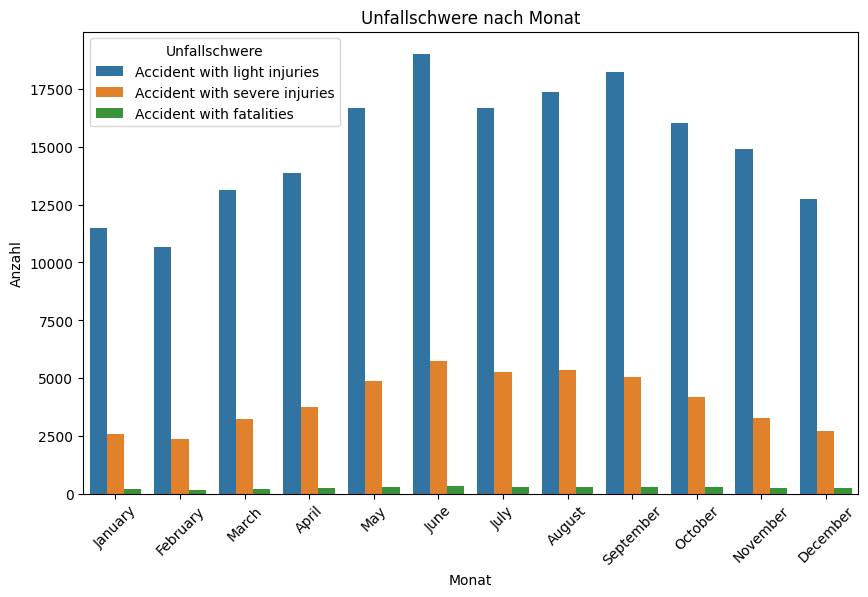

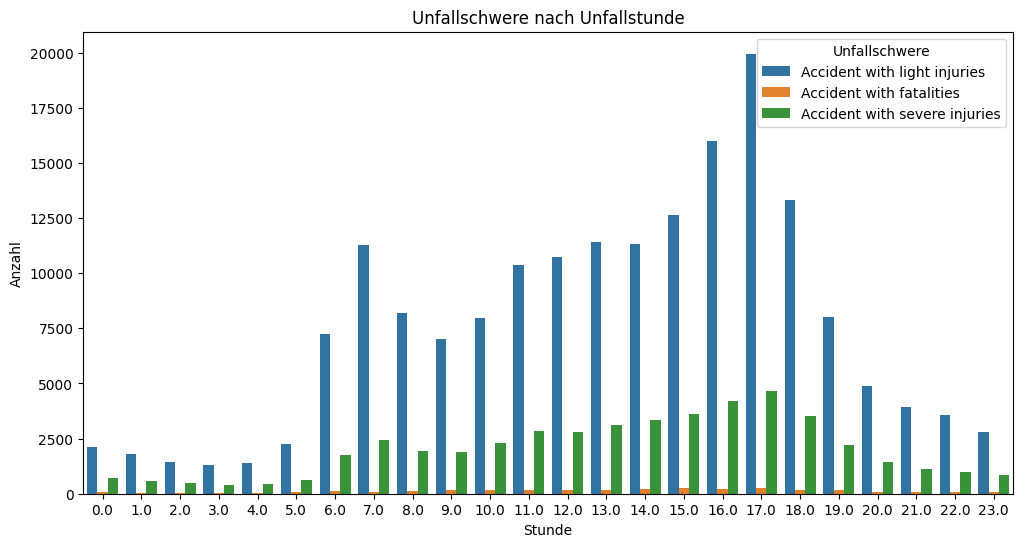

In [8]:
#Zeitliche Einflüsse auf Schweregrad
# Wochentag und Unfallschwere
plt.figure(figsize=(10, 6))
sns.countplot(data=df_original, x='AccidentWeekDay_en', hue='AccidentSeverityCategory_en')
plt.title('Unfallschwere nach Wochentag')
plt.xlabel('Wochentag')
plt.ylabel('Anzahl')
plt.xticks(rotation=45)
plt.legend(title='Unfallschwere')
plt.show()

# Monat und Unfallschwere
plt.figure(figsize=(10, 6))
sns.countplot(data=df_original, x='AccidentMonth_en', hue='AccidentSeverityCategory_en')
plt.title('Unfallschwere nach Monat')
plt.xlabel('Monat')
plt.ylabel('Anzahl')
plt.xticks(rotation=45)
plt.legend(title='Unfallschwere')
plt.show()

# Unfallstunde und Unfallschwere
plt.figure(figsize=(12, 6))
sns.countplot(data=df_original, x='AccidentHour', hue='AccidentSeverityCategory_en')
plt.title('Unfallschwere nach Unfallstunde')
plt.xlabel('Stunde')
plt.ylabel('Anzahl')
plt.legend(title='Unfallschwere')
plt.show()

Interpretation: 
Die EDA zeigt, dass verschiedene Merkmale potenziell Hinweise auf den Schweregrad eines Unfalls geben könnten. Diese Merkmale könnten genutzt werden, um ein Modell zur Vorhersage des Unfall-Schweregrades zu entwickeln. Ein solches Modell könnte helfen, gefährdete Zeiträume, Strassen und Umstände zu identifizieren und gezielte Präventionsmassnahmen zu ergreifen.

#### Geographische Analyse

In [9]:
# import folium
# from pyproj import Transformer
# 
# # Transformer für die Umrechnung von LV95 (EPSG:2056) nach WGS84 (EPSG:4326)
# transformer = Transformer.from_crs("EPSG:2056", "EPSG:4326", always_xy=True)
# 
# # Koordinaten für die Mitte der Karte berechnen (nach Umrechnung)
# avg_lat, avg_lon = transformer.transform(df_original['AccidentLocation_CHLV95_E'].mean(), df_original['AccidentLocation_CHLV95_N'].mean())
# 
# # Map erstellen mit umgerechneten Mittelwerten als Startpunkt
# m = folium.Map(location=[avg_lon, avg_lat], zoom_start=10)
# 
# # Punkte hinzufügen (Koordinaten für jeden Unfallort umrechnen)
# for _, row in df_original.iterrows():
#     lon, lat = transformer.transform(row['AccidentLocation_CHLV95_E'], row['AccidentLocation_CHLV95_N'])
#     folium.CircleMarker(
#         location=[lat, lon],
#         radius=3,
#         color='blue',
#         fill=True,
#         fill_opacity=0.6
#     ).add_to(m)
# 
# # Karte speichern und anzeigen
# m.save("Unfallkarte.html")
# display(m)

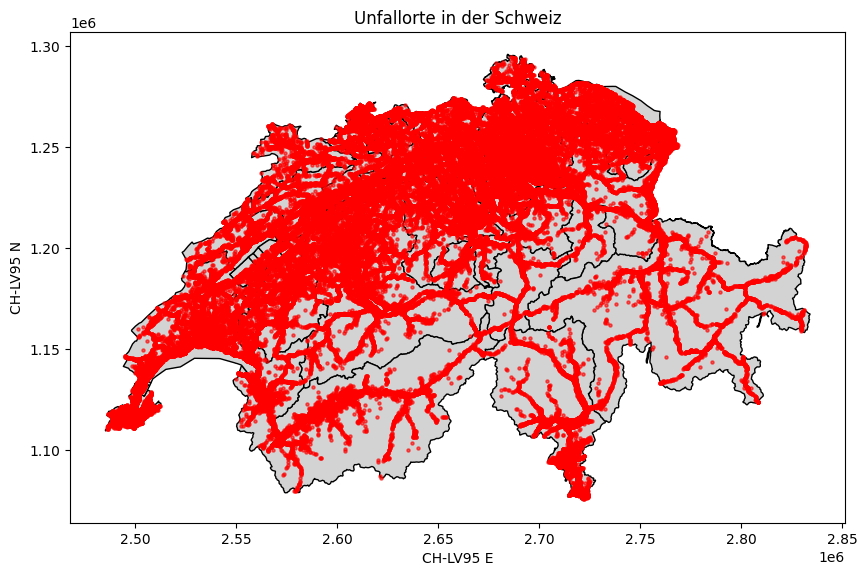

In [10]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# 1. Erstellen eines GeoDataFrames für die Unfalldaten mit festgelegtem CRS
# Koordinaten in Punkte umwandeln und direkt das LV95-Koordinatensystem (EPSG:2056) setzen
df_original['geometry'] = df_original.apply(lambda row: Point(row['AccidentLocation_CHLV95_E'], row['AccidentLocation_CHLV95_N']), axis=1)
accident_gdf = gpd.GeoDataFrame(df_original, geometry='geometry', crs="EPSG:2056")

# 2. Laden der Schweiz-Karte mit Kantonsgrenzen und Setzen des Koordinatensystems auf WGS84 (EPSG:4326)
swiss_map_path = 'data/gadm41_CHE_1.shp'
swiss_map = gpd.read_file(swiss_map_path)

# Setze das CRS des Shapefiles auf WGS84 (EPSG:4326), falls es nicht definiert ist
if swiss_map.crs is None:
    swiss_map.set_crs("EPSG:4326", inplace=True)

# Die Karte ins LV95-Koordinatensystem umprojizieren
swiss_map = swiss_map.to_crs("EPSG:2056")

# 3. Plotten der Karte und der Unfalldaten
fig, ax = plt.subplots(figsize=(10, 10))
swiss_map.plot(ax=ax, color='lightgrey', edgecolor='black')  # Hintergrundkarte der Kantone
accident_gdf.plot(ax=ax, color='red', markersize=5, alpha=0.6)  # Unfallorte als rote Punkte

# Beschriftungen und Titel
plt.title("Unfallorte in der Schweiz")
plt.xlabel("CH-LV95 E")
plt.ylabel("CH-LV95 N")
plt.show()

Interpretation: 
Diese Visualisierung verdeutlicht, dass Unfälle in der Schweiz stark mit dem Verkehrsaufkommen und der Infrastruktur korrelieren. Städte, Hauptverkehrsstrassen und Autobahnen sind am stärksten betroffen. In weniger dicht besiedelten oder abgelegenen Gebieten ist die Unfallrate deutlich geringer, was durch die geringere Dichte der roten Punkte repräsentiert wird. Dies entspricht wahrscheinlich dem geringeren Verkehrsaufkommen in diesen Regionen.

#### Hypothesentests

##### Beziehung zwischen Strassentyp und Unfallschweregrad
###### Nullhypothese
Es gibt keinen Zusammenhang zwischen dem Strassentyp und der Schwere des Unfalls. Der Strassentyp hat keinen Einfluss auf die Wahrscheinlichkeit eines schweren Unfalls. 
###### Alternativhypothese
Es gibt einen signifikanten Zusammenhang zwischen dem Strassentyp und der Schwere des Unfalls. Bestimmte Strassentypen sind eher mit schwereren Unfällen verbunden.

In [11]:
# Chi-Quadrat-Test
from scipy.stats import chi2_contingency

# Kontingenztabelle für RoadType und AccidentSeverityCategory
contingency_table = pd.crosstab(df_original['RoadType'], df_original['AccidentSeverityCategory'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Quadrat-Statistik:", chi2)
print("p-Wert:", p)
print("Freiheitsgrade:", dof)


Chi-Quadrat-Statistik: 2204.3659514731253
p-Wert: 0.0
Freiheitsgrade: 10


Interpretation: zwischen dem Strassentyp und der Unfallschwere. Das deutet darauf hin, dass bestimmte Strassentypen eher mit schwereren oder leichteren Unfällen verbunden sind. Dies könnte auf unterschiedliche Risiken je nach Strassentyp hinweisen und liefert potenziell wertvolle Hinweise für gezielte Verkehrssicherheitsmaßnahmen auf bestimmten Strassen.

##### Zusammenhang zwischen Wochentag und Unfallschweregrad
###### Nullhypothese
Es besteht kein Zusammenhang zwischen dem Wochentag des Unfalls und der Schwere des Unfalls. Die Unfallschwere ist unabhängig vom Wochentag.
###### Alternativhypothese
Es besteht ein Zusammenhang zwischen dem Wochentag des Unfalls und der Schwere des Unfalls. An bestimmten Wochentagen treten häufiger schwere Unfälle auf als an anderen.

In [12]:
# Chi-Quadrat-Test
from scipy.stats import chi2_contingency

# Kontingenztabelle für AccidentWeekDay und AccidentSeverityCategory erstellen
contingency_table = pd.crosstab(df_original['AccidentWeekDay'], df_original['AccidentSeverityCategory'])

# Chi-Quadrat-Test durchführen
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-Quadrat-Statistik:", chi2)
print("p-Wert:", p)
print("Freiheitsgrade:", dof)


Chi-Quadrat-Statistik: 495.4779805347233
p-Wert: 2.0320407870713823e-98
Freiheitsgrade: 12


Interpretation: Da der p-Wert extrem klein ist, zeigt das Ergebnis, dass die Verteilung der Unfallschweregrade tatsächlich vom Wochentag abhängt. Dies könnte darauf hinweisen, dass an bestimmten Wochentagen (z. B. Wochenenden oder Wochentagen mit hohem Verkehrsaufkommen) Unfälle häufiger schwerwiegender sind oder dass sich das Unfallrisiko in Bezug auf die Schwere variiert. Dieses Ergebnis könnte darauf hindeuten, dass gezielte Maßnahmen oder Untersuchungen an spezifischen Wochentagen sinnvoll wären.

## Unifying & Transformation 

In diesem Kapitel analysieren wir die vorhandenen Datentypen und Formate und vereinheitlichen diese bei Bedarf.

#### Datentypen prüfen und anpassen

In [13]:
# Überblick über die Datentypen
print(df_original.dtypes)

# Datentypen anpassen, falls nötig
# Konvertieren in Integer für das Jahr
df_original['AccidentYear'] = df_original['AccidentYear'].astype(int)

# Sicherstellen, dass AccidentSeverityCategory, AccidentType, CantonCode, AccidentWeekDay als kategorisch gesetzt sind
categorical_columns = ['AccidentSeverityCategory', 'CantonCode', 'AccidentType', 'AccidentWeekDay']
for col in categorical_columns:
    df_original[col] = df_original[col].astype('category')

# Überprüfen der Koordinaten als numerische Werte
df_original['AccidentLocation_CHLV95_E'] = pd.to_numeric(df_original['AccidentLocation_CHLV95_E'], errors='coerce')
df_original['AccidentLocation_CHLV95_N'] = pd.to_numeric(df_original['AccidentLocation_CHLV95_N'], errors='coerce')
df_original['MunicipalityCode'] = pd.to_numeric(df_original['MunicipalityCode'], errors='coerce')

# Datentypen nach der Anpassung anzeigen
print(df_original.dtypes)


AccidentUID                     object
AccidentType                    object
AccidentType_de                 object
AccidentType_fr                 object
AccidentType_it                 object
AccidentType_en                 object
AccidentSeverityCategory        object
AccidentSeverityCategory_de     object
AccidentSeverityCategory_fr     object
AccidentSeverityCategory_it     object
AccidentSeverityCategory_en     object
AccidentInvolvingPedestrian       bool
AccidentInvolvingBicycle          bool
AccidentInvolvingMotorcycle       bool
RoadType                        object
RoadType_de                     object
RoadType_fr                     object
RoadType_it                     object
RoadType_en                     object
AccidentLocation_CHLV95_E        int64
AccidentLocation_CHLV95_N        int64
CantonCode                      object
MunicipalityCode                 int64
AccidentYear                     int64
AccidentMonth                    int64
AccidentMonth_de         

#### Zeitliche Merkmale verarbeiten

In [14]:
# Sicherstellen, dass 'AccidentMonth' und 'AccidentYear' als Integer vorliegen
df_original['AccidentMonth'] = df_original['AccidentMonth'].astype(int)
df_original['AccidentYear'] = df_original['AccidentYear'].astype(int)

# Fehlenede Stundenwerte mit 0 auffüllen und in int konvertieren
df_original['AccidentHour'] = df_original['AccidentHour'].fillna(0).astype(int)

# Neues Datum-Zeit-Feld erstellen, wobei der Tag standardmäßig auf 1 gesetzt wird
df_original['AccidentDateTime'] = pd.to_datetime(dict(year=df_original['AccidentYear'], month=df_original['AccidentMonth'], day=1)) + pd.to_timedelta(df_original['AccidentHour'], unit='h')

# Unfallzeit anzeigen
df_original[['AccidentYear', 'AccidentMonth', 'AccidentHour', 'AccidentDateTime']].head()


,AccidentYear,AccidentMonth,AccidentHour,AccidentDateTime
0,2012,1,16,2012-01-01 16:00:00
1,2012,1,0,2012-01-01 00:00:00
2,2012,1,11,2012-01-01 11:00:00
3,2012,1,11,2012-01-01 11:00:00
4,2012,1,8,2012-01-01 08:00:00


Wir konvertieren die Datumsangaben in ein Format, das eine Analyse zeitlicher Muster erlaubt.

Als erstes werden die AccidentMonth und AccidentHour Spalten werden in Ganzzahlen konvertiert.

Dann wird die Spalte AccidentDateTime  erstellt, indem Jahr, Monat und Stunde kombiniert werden. Dies erleichtert die Analyse zeitlicher Muster, da wir nun ein komplettes Zeitformat haben.

Der Tag (day) wird auf 1 gesetzt, um ein vollständiges Datum zu erstellen. Dies ist sinnvoll, wenn nur das Jahr und der Monat verfügbar sind, da wir so zumindest den Beginn des jeweiligen Monats angeben können.

Durch pd.to_timedelta() fügen wir die Unfallstunden hinzu, um die AccidentDateTime-Spalte präziser zu gestalten.

#### Boolesche Werte als solche formatieren

In [15]:
# Boolesche Spalten identifizieren
boolean_columns = ['AccidentInvolvingPedestrian', 'AccidentInvolvingBicycle', 'AccidentInvolvingMotorcycle']

# Konvertieren der Spalten in boolesche Typen
for col in boolean_columns:
    df_original[col] = df_original[col].astype(bool)

# Ergebnis prüfen
print(df_original[boolean_columns].dtypes)


AccidentInvolvingPedestrian    bool
AccidentInvolvingBicycle       bool
AccidentInvolvingMotorcycle    bool
dtype: object


Die Spalten AccidentInvolvingPedestrian, AccidentInvolvingBicycle und AccidentInvolvingMotorcycle werden in boolesche Datentypen konvertiert. Dieses Vorgehen kann spätere Analysen erleichtern, da diese Variablen nun explizit als True/False Werte vorliegen.

#### Überprüfung der Transformationen

In [16]:
# Datentypen überprüfen
print(df_original.dtypes)

# Beispielansicht der ersten Zeilen des transformierten Datensatzes
df_original.head()

AccidentUID                            object
AccidentType                         category
AccidentType_de                        object
AccidentType_fr                        object
AccidentType_it                        object
AccidentType_en                        object
AccidentSeverityCategory             category
AccidentSeverityCategory_de            object
AccidentSeverityCategory_fr            object
AccidentSeverityCategory_it            object
AccidentSeverityCategory_en            object
AccidentInvolvingPedestrian              bool
AccidentInvolvingBicycle                 bool
AccidentInvolvingMotorcycle              bool
RoadType                               object
RoadType_de                            object
RoadType_fr                            object
RoadType_it                            object
RoadType_en                            object
AccidentLocation_CHLV95_E               int64
AccidentLocation_CHLV95_N               int64
CantonCode                        

,AccidentUID,AccidentType,AccidentType_de,AccidentType_fr,AccidentType_it,AccidentType_en,AccidentSeverityCategory,AccidentSeverityCategory_de,AccidentSeverityCategory_fr,AccidentSeverityCategory_it,...,AccidentMonth_en,AccidentWeekDay,AccidentWeekDay_de,AccidentWeekDay_fr,AccidentWeekDay_it,AccidentWeekDay_en,AccidentHour,AccidentHour_text,geometry,AccidentDateTime
0,B3ECE649BB1A004CE0430A839427004C,at2,Auffahrunfall,accident par tamponnement,Incidente di tamponamento,Accident with rear-end collision,as3,Unfall mit Leichtverletzten,accident avec blessés légers,Incidente con feriti leggeri,...,January,aw403,Mittwoch,mercredi,Mercoledì,Wednesday,16,16h-17h,POINT (2646094 1249153),2012-01-01 16:00:00
1,B3ECEDCC96700122E0430A8394270122,at0,Schleuder- oder Selbstunfall,dérapage ou perte de maîtrise,Incidente di sbandamento o per colpa propria,Accident with skidding or self-accident,as3,Unfall mit Leichtverletzten,accident avec blessés légers,Incidente con feriti leggeri,...,January,aw404,Donnerstag,jeudi,Giovedì,Thursday,0,00h-01h,POINT (2723620 1215353),2012-01-01 00:00:00
2,B3F45973E4C80028E0430A8394270028,at1,Überholunfall oder Fahrstreifenwechsel,accident lors d'un dépassement ou lors d'un ch...,Incidente di sorpasso o al cambiamento di corsia,Accident when overtaking or changing lanes,as3,Unfall mit Leichtverletzten,accident avec blessés légers,Incidente con feriti leggeri,...,January,aw402,Dienstag,mardi,Martedì,Tuesday,11,11h-12h,POINT (2697600 1226517),2012-01-01 11:00:00
3,B3F45974108E0028E0430A8394270028,at8,Fussgängerunfall,accident impliquant des piétons,Incidente con pedoni,Accident involving pedestrian(s),as3,Unfall mit Leichtverletzten,accident avec blessés légers,Incidente con feriti leggeri,...,January,aw401,Montag,lundi,Lunedí,Monday,11,11h-12h,POINT (2722196 1116449),2012-01-01 11:00:00
4,B3F60AA67758013EE0430A839427013E,at4,Einbiegeunfall,accident en s'engageant sur une route,Incidente nell’immettersi in una strada,Accident when turning-into main road,as2,Unfall mit Schwerverletzten,accident avec blessés graves,Incidente con feriti gravi,...,January,aw401,Montag,lundi,Lunedí,Monday,8,08h-09h,POINT (2656182 1240653),2012-01-01 08:00:00


## Data Cleansing

Beurteilung der Datenqualität und erforderliche Bereinigung der Daten

#### Mehrsprachige Spalten löschen

Da es im Datensatz verschiedene Spalten auf die Sprachen Englisch, Französisch, Italienisch und Deutsch hat, löschen wir nun alle die nicht Deutsch sind raus. Somit vermeiden wir Redundanzen im Dataset.

In [17]:
#alle Spaltenausführungen auf en, it, fr löschen
df_de = df_original.drop(columns=df_original.filter(regex='(_en|_fr|_it)$').columns)
df_de.to_csv("data/filteredDataFrame.csv", index=False)

#### Fehlende Werte identifizieren und behandeln


In [18]:
# Fehlende Werte für jede Spalte anzeigen
missing_values = df_de.isnull().sum()
print("Fehlende Werte in jeder Spalte:\n", missing_values[missing_values > 0])

# Beispielentscheidung für fehlende Werte
# 1. Bei numerischen Spalten wie AccidentHour können wir den Mittelwert zur Imputation verwenden
# 2. Bei anderen, optionalen Spalten entscheiden wir uns möglicherweise für das Entfernen

# Imputation für numerische Spalten (hier: AccidentHour als Beispiel)
if 'AccidentHour' in df_de.columns:
    df_de['AccidentHour'] = df_de['AccidentHour'].fillna(df_de['AccidentHour'].mean())


# Entfernen von Spalten/Zeilen mit zu vielen fehlenden Werten, falls relevant
# (hier keine spezifische Spalte genannt, daher nur als Option)
df_de.dropna(axis=1, thresh=len(df_de) * 0.5, inplace=True)  # Beispiel: Spalten mit mehr als 50% fehlenden Werten entfernen


Fehlende Werte in jeder Spalte:
 AccidentHour_text    5
dtype: int64


Wir prüfen, welche Spalten wie viele missing values haben. Da wir einen sehr gepflegten Datensatz von dem schweizerischen Bund haben, fehlen bei uns nur sehr wenige Daten in der Spalte AccidentHour_text. Da es sich hier um einen Datentyp Int handelt, entscheiden wir uns dazu, die 5 missing values mit dem Durchschnitt der AccidentHour_text zu füllen. Falls es Spalten mit vielen fehlenden Werten gäbe z.B. > 50%, dann könnte eine Entfernung der Spalte sinnvoll sein. Das ist aber in unserem Fall nicht so und wird demnach nicht angewandt.

#### Duplikate entfernen

Wir prüfen den Datensatz auf Duplikate, indem wir prüfen, dass keine AccidentUID mehrmals vorkommt.

In [19]:
# Prüfen, ob die Spalte AccidentUID vorhanden ist
if 'AccidentUID' in df_de.columns:
    # Duplikate basierend auf AccidentUID identifizieren
    duplicates = df_de[df_de.duplicated(subset='AccidentUID', keep=False)]

    # Anzeigen der Duplikate
    print("Duplikate basierend auf AccidentUID:")
    print(duplicates)

    # Entfernen der Duplikate und nur die erste Instanz behalten
    df_de = df_de.drop_duplicates(subset='AccidentUID')

    print("Anzahl der Duplikate entfernt:", len(duplicates) // 2)  # Da jedes Duplikat zwei Einträge hat
else:
    print("Die Spalte 'AccidentUID' ist nicht vorhanden.")

Duplikate basierend auf AccidentUID:
Empty DataFrame
Columns: [AccidentUID, AccidentType, AccidentType_de, AccidentSeverityCategory, AccidentSeverityCategory_de, AccidentInvolvingPedestrian, AccidentInvolvingBicycle, AccidentInvolvingMotorcycle, RoadType, RoadType_de, AccidentLocation_CHLV95_E, AccidentLocation_CHLV95_N, CantonCode, MunicipalityCode, AccidentYear, AccidentMonth, AccidentMonth_de, AccidentWeekDay, AccidentWeekDay_de, AccidentHour, AccidentHour_text, geometry, AccidentDateTime]
Index: []

[0 rows x 23 columns]
Anzahl der Duplikate entfernt: 0


Interpretation: Die Daten sind hinsichtlich der AccidentUID-Spalte bereits sauber und jede Zeile repräsentiert einen einzigartigen Unfall. Dies gewährleistet die Integrität des Datensatzes, da keine doppelten Einträge vorhanden sind, die die Analyse verzerren könnten. Der Datensatz ist somit gut strukturiert und bereit für die weitere Analyse, ohne dass Duplikate entfernt werden müssen.

#### Fehlerhafte Werte oder Ausreisser identifizieren


Wir prüfen auf fehlerhafte Werte oder Ausreisser in allen vorhandenen numerischen Spalten. Im Kapitel "Datentypen prüfen und anpassen" haben wir folgende Spalten als nummerisch identifiziert: MunicipalityCode, AccidentYear, AccidentMonth, AccidentHour, AccidentLocation_CHLV95_E und AccidentLocation_CHLV95_N. Wir machen das indem wir Bedingungen und Statistiken verwenden, um Extremwerte oder unrealistische Werte zu identifizieren.

##### AccidentHour auf realistische Werte prüfen (0-23)

In [20]:
# Überprüfung der Werte in AccidentHour (nur Werte zwischen 0 und 23 sind gültig)
invalid_hours = df_de[(df_de['AccidentHour'] < 0) | (df_de['AccidentHour'] > 23)]
print(f"Anzahl der fehlerhaften Stundenwerte in 'AccidentHour': {len(invalid_hours)}")

# Ungültige Werte auf den nächsten gültigen Wert setzen oder entfernen
df_de['AccidentHour'] = df_de['AccidentHour'].apply(lambda x: x if 0 <= x <= 23 else np.nan)
df_de['AccidentHour'] = df_de['AccidentHour'].fillna(df_de['AccidentHour'].mean())


Anzahl der fehlerhaften Stundenwerte in 'AccidentHour': 0


Interpretation: Keine Stundenangabe ist ausserhalb der realistischen Angabe von 0-23.

##### Geographische Koordinaten auf mögliche Ausreisser prüfen

In [21]:
# Setze die erlaubten Bereiche für Schweizer Koordinaten LV95 (beispielhafte Werte)
min_lon, max_lon = 2485000, 2835000  # Werte für AccidentLocation_CHLV95_E
min_lat, max_lat = 1075000, 1296000  # Werte für AccidentLocation_CHLV95_N

# Prüfen auf ungültige Koordinaten
invalid_coords = df_de[
    (df_de['AccidentLocation_CHLV95_E'] < min_lon) | (df_de['AccidentLocation_CHLV95_E'] > max_lon) |
    (df_de['AccidentLocation_CHLV95_N'] < min_lat) | (df_de['AccidentLocation_CHLV95_N'] > max_lat)
]
print(f"Anzahl der fehlerhaften Koordinatenwerte: {len(invalid_coords)}")

# Ungültige Werte entfernen oder ersetzen
df_de = df_de[~df_de.index.isin(invalid_coords.index)]


Anzahl der fehlerhaften Koordinatenwerte: 0


Interpretation: Keine Koordinatenangabe wird als Ausreisser identifiziert.

##### Postleitzahl auf realistische Werte prüfen (1 - 9999)

In [22]:
# Definieren des gültigen Bereichs für den MunicipalityCode
min_municipality_code, max_municipality_code = 1, 9999

# Überprüfen auf fehlerhafte Werte
invalid_municipalities = df_de[(df_de['MunicipalityCode'] < min_municipality_code) | (df_de['MunicipalityCode'] > max_municipality_code)]
print("Anzahl der fehlerhaften Werte im 'MunicipalityCode':", len(invalid_municipalities))

Anzahl der fehlerhaften Werte im 'MunicipalityCode': 0


Interpretation: Alle im Datensatz vorhandenen Postleitzahlen befinden sich im realistischen Range von 0-9999.

##### Unfalljahr auf realistische Werte prüfen (1990 - current year)

In [23]:
from datetime import datetime

# Definieren des gültigen Bereichs für AccidentYear
current_year = datetime.now().year
min_year, max_year = 1990, current_year

# Überprüfen auf fehlerhafte Werte
invalid_years = df_de[(df_de['AccidentYear'] < min_year) | (df_de['AccidentYear'] > max_year)]
print("Anzahl der fehlerhaften Werte im 'AccidentYear':", len(invalid_years))


Anzahl der fehlerhaften Werte im 'AccidentYear': 0


Interpretation: Keine Werte der Unfalljahre befinden sich ausserhalb von 1990 und 2024.

##### Unfallmonat auf realistische Werte prüfen (1-12)

In [24]:
# Überprüfen auf fehlerhafte Werte in AccidentMonth
invalid_months = df_de[(df_de['AccidentMonth'] < 1) | (df_de['AccidentMonth'] > 12)]
print("Anzahl der fehlerhaften Werte im 'AccidentMonth':", len(invalid_months))

Anzahl der fehlerhaften Werte im 'AccidentMonth': 0


Interpretation: Es befinden sich in der Spalte Monate keine Werte, die ausserhalb der Range 1 - 12 fallen. Das bedeutet, alle angegebenen Monate sind realistisch.

#### Vermeidung von Redundanzen nach Bereinigung

Beim Betrachten des bereinigten und überprüften Datensatzes ist zu erkennen, dass einige Informationen doppelt vorhanden sind. Diese gilt es nun zu entfernen und den Datensatz zu vereinheitlichen.

##### Begründung für das Entfernen der Felder
- **AccidentUID**:
Diese Spalte dient nur zur eindeutigen Identifikation und hat keinen direkten analytischen Wert. Nach der Feststellung, dass keine Duplikate vorliegen, kann diese entfernt werden.

- **AccidentType, AccidentSeverityCategory, RoadType**:
Die entsprechenden Informationen sind in den deutschsprachigen Spalten (AccidentType_de, AccidentSeverityCategory_de, RoadType_de) vollständig enthalten, daher sind die Originalspalten redundant.

- **Zeitliche Spalten (AccidentYear, AccidentMonth, AccidentMonth_de, AccidentWeekDay, AccidentHour)**:
Diese wurden bereits in AccidentDateTime integriert, das präziser ist und alle relevanten Informationen enthält. Die originalen zeitlichen Spalten sind daher überflüssig.


In [25]:
df_de.head() 

,AccidentUID,AccidentType,AccidentType_de,AccidentSeverityCategory,AccidentSeverityCategory_de,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle,RoadType,RoadType_de,...,MunicipalityCode,AccidentYear,AccidentMonth,AccidentMonth_de,AccidentWeekDay,AccidentWeekDay_de,AccidentHour,AccidentHour_text,geometry,AccidentDateTime
0,B3ECE649BB1A004CE0430A839427004C,at2,Auffahrunfall,as3,Unfall mit Leichtverletzten,False,False,False,rt432,Hauptstrasse,...,4001,2012,1,Januar,aw403,Mittwoch,16,16h-17h,POINT (2646094 1249153),2012-01-01 16:00:00
1,B3ECEDCC96700122E0430A8394270122,at0,Schleuder- oder Selbstunfall,as3,Unfall mit Leichtverletzten,False,False,False,rt433,Nebenstrasse,...,1630,2012,1,Januar,aw404,Donnerstag,0,00h-01h,POINT (2723620 1215353),2012-01-01 00:00:00
2,B3F45973E4C80028E0430A8394270028,at1,Überholunfall oder Fahrstreifenwechsel,as3,Unfall mit Leichtverletzten,False,False,False,rt432,Hauptstrasse,...,1321,2012,1,Januar,aw402,Dienstag,11,11h-12h,POINT (2697600 1226517),2012-01-01 11:00:00
3,B3F45974108E0028E0430A8394270028,at8,Fussgängerunfall,as3,Unfall mit Leichtverletzten,True,False,False,rt433,Nebenstrasse,...,5002,2012,1,Januar,aw401,Montag,11,11h-12h,POINT (2722196 1116449),2012-01-01 11:00:00
4,B3F60AA67758013EE0430A839427013E,at4,Einbiegeunfall,as2,Unfall mit Schwerverletzten,False,False,True,rt433,Nebenstrasse,...,4192,2012,1,Januar,aw401,Montag,8,08h-09h,POINT (2656182 1240653),2012-01-01 08:00:00


In [26]:
# Felder, die entfernt werden sollen
columns_to_drop = [
    'AccidentUID', 
    'AccidentType', 
    'AccidentSeverityCategory', 
    'RoadType',
    'AccidentYear', 
    'AccidentMonth', 
    'AccidentMonth_de', 
    'AccidentWeekDay', 
    'AccidentHour',
    'AccidentHour_text'
]

# Entfernen der Spalten
df_de_cleaned = df_de.drop(columns=columns_to_drop)

# Überprüfung der verbleibenden Spalten
print("Verbleibende Spalten nach dem Entfernen redundanten Felder:\n", df_de_cleaned.columns)

print("Der bereinigte Datensatz sieht nun folgendermassen aus:\n")
df_de_cleaned.head() 

Verbleibende Spalten nach dem Entfernen redundanten Felder:
 Index(['AccidentType_de', 'AccidentSeverityCategory_de',
       'AccidentInvolvingPedestrian', 'AccidentInvolvingBicycle',
       'AccidentInvolvingMotorcycle', 'RoadType_de',
       'AccidentLocation_CHLV95_E', 'AccidentLocation_CHLV95_N', 'CantonCode',
       'MunicipalityCode', 'AccidentWeekDay_de', 'geometry',
       'AccidentDateTime'],
      dtype='object')
Der bereinigte Datensatz sieht nun folgendermassen aus:



,AccidentType_de,AccidentSeverityCategory_de,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle,RoadType_de,AccidentLocation_CHLV95_E,AccidentLocation_CHLV95_N,CantonCode,MunicipalityCode,AccidentWeekDay_de,geometry,AccidentDateTime
0,Auffahrunfall,Unfall mit Leichtverletzten,False,False,False,Hauptstrasse,2646094,1249153,AG,4001,Mittwoch,POINT (2646094 1249153),2012-01-01 16:00:00
1,Schleuder- oder Selbstunfall,Unfall mit Leichtverletzten,False,False,False,Nebenstrasse,2723620,1215353,GL,1630,Donnerstag,POINT (2723620 1215353),2012-01-01 00:00:00
2,Überholunfall oder Fahrstreifenwechsel,Unfall mit Leichtverletzten,False,False,False,Hauptstrasse,2697600,1226517,SZ,1321,Dienstag,POINT (2697600 1226517),2012-01-01 11:00:00
3,Fussgängerunfall,Unfall mit Leichtverletzten,True,False,False,Nebenstrasse,2722196,1116449,TI,5002,Montag,POINT (2722196 1116449),2012-01-01 11:00:00
4,Einbiegeunfall,Unfall mit Schwerverletzten,False,False,True,Nebenstrasse,2656182,1240653,AG,4192,Montag,POINT (2656182 1240653),2012-01-01 08:00:00


##### Anpassung der Spaltennamen

Der Datensatz enthält nur noch eine Sprache und keine doppelten Informationen. Spaltennamen welche "_de" oder "_text" enthalten, können nun nach entfernen der redundanten Spalten angepasst werden.

In [27]:
# Entfernen von '_de' und '_text' aus allen Spaltennamen
df_de_cleaned.columns = df_de_cleaned.columns.str.replace('_de', '').str.replace('_text', '')

# Prüfung der aktualisierten Spaltennamen
print("Aktualisierte Spaltennamen:\n", df_de_cleaned.columns)

Aktualisierte Spaltennamen:
 Index(['AccidentType', 'AccidentSeverityCategory',
       'AccidentInvolvingPedestrian', 'AccidentInvolvingBicycle',
       'AccidentInvolvingMotorcycle', 'RoadType', 'AccidentLocation_CHLV95_E',
       'AccidentLocation_CHLV95_N', 'CantonCode', 'MunicipalityCode',
       'AccidentWeekDay', 'geometry', 'AccidentDateTime'],
      dtype='object')


##### Umwandlung der Spaltentypen

Nach der Entfernung von redundanter Spalten erhalten einige Spalten, welche aktuell als String definiert sind, eine neue Wichtigkeit - nämlich sind diese nun Kategorien. Sie müssen dementsprechend konvertiert werden.

Dies betrifft folgende Felder:

- AccidentSeverityCategory
- RoadType
- AccidentWeekDay
- CantonCode
- MunicipalityCode 
- AccidentWeekDay


In [28]:
# Liste der Spalten, die in category umgewandelt werden sollen
columns_to_convert = [
    'AccidentType', 
    'AccidentSeverityCategory', 
    'RoadType', 
    'AccidentWeekDay', 
    'CantonCode',
    'MunicipalityCode'
]

# Umwandlung jeder Spalte in category
for col in columns_to_convert:
    df_de_cleaned[col] = df_de_cleaned[col].astype('category')

# Überprüfung der Datentypen
print("Datentypen nach der Umwandlung:\n", df_de_cleaned[columns_to_convert].dtypes)

# Eindeutige Werte für jede Spalte anzeigen (optional)
for col in columns_to_convert:
    print(f"Eindeutige Werte in {col}:")
    print(df_de_cleaned[col].unique())


Datentypen nach der Umwandlung:
 AccidentType                category
AccidentSeverityCategory    category
RoadType                    category
AccidentWeekDay             category
CantonCode                  category
MunicipalityCode            category
dtype: object
Eindeutige Werte in AccidentType:
['Auffahrunfall', 'Schleuder- oder Selbstunfall', 'Überholunfall oder Fahrstreifenwechsel', 'Fussgängerunfall', 'Einbiegeunfall', ..., 'Andere', 'Frontalkollision', 'Überqueren der Fahrbahn', 'Parkierunfall', 'Tierunfall']
Length: 11
Categories (11, object): ['Abbiegeunfall', 'Andere', 'Auffahrunfall', 'Einbiegeunfall', ..., 'Schleuder- oder Selbstunfall', 'Tierunfall', 'Überholunfall oder Fahrstreifenwechsel', 'Überqueren der Fahrbahn']
Eindeutige Werte in AccidentSeverityCategory:
['Unfall mit Leichtverletzten', 'Unfall mit Schwerverletzten', 'Unfall mit Getöteten']
Categories (3, object): ['Unfall mit Getöteten', 'Unfall mit Leichtverletzten', 'Unfall mit Schwerverletzten']
Eindeutige 

## Analysis & Validation 

In dieser Phase stehen Überprüfung der Datenverteilungen, Identifikation von Abweichungen und Erstellung von Kennzahlen im Vordergrund. Dies bildet die Grundlage für die nächste Phase, dem Feature Selection & Engineering. 


### Analyse der Verteilungen

C:\Users\Admin\AppData\Local\Temp\ipykernel_6752\3541156921.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='AccidentSeverityCategory', palette='coolwarm')


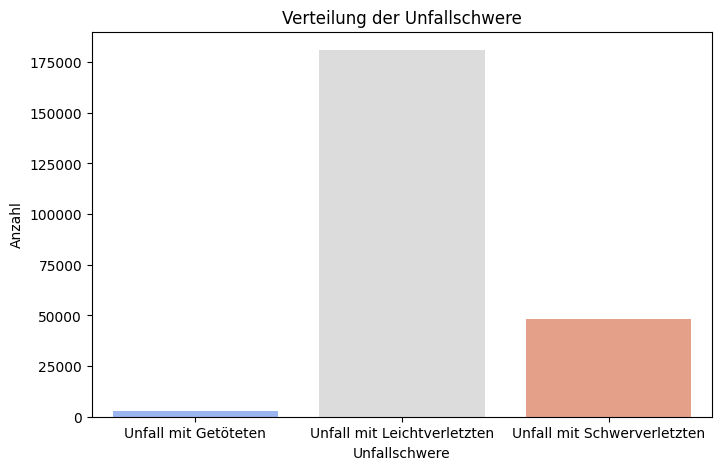

C:\Users\Admin\AppData\Local\Temp\ipykernel_6752\3541156921.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='AccidentType', palette='viridis')


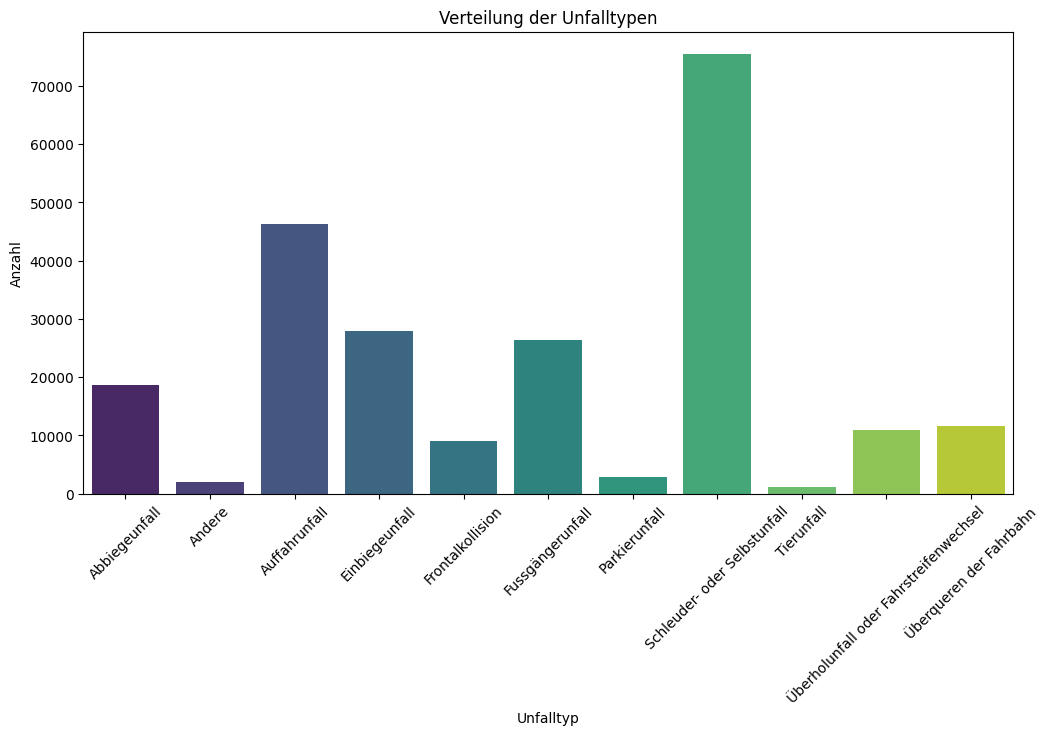

In [29]:
# Neudeklarierung des Dataframes für die Analyse & Validation
df_cleaned = df_de_cleaned

# Verteilung der Zielvariable (Unfallschwere)
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='AccidentSeverityCategory', palette='coolwarm')
plt.title("Verteilung der Unfallschwere")
plt.xlabel("Unfallschwere")
plt.ylabel("Anzahl")
plt.show()

# Verteilung der Unfalltypen
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='AccidentType', palette='viridis')
plt.title("Verteilung der Unfalltypen")
plt.xlabel("Unfalltyp")
plt.ylabel("Anzahl")
plt.xticks(rotation=45)
plt.show()


**Verteilung der Unfallschwere**

Die Mehrheit der Unfälle führt zu leichten Verletzungen, gefolgt von Unfällen mit schweren Verletzungen. Tödliche Unfälle sind im Vergleich zu den anderen Kategorien äußerst selten.

Dies zeigt, dass die Zielvariable (AccidentSeverityCategory) unausgewogen ist.
Für die Modellierung könnte dies ein Problem darstellen, da Machine-Learning-Modelle häufig Schwierigkeiten haben, die kleinere Klasse (tödliche Unfälle) korrekt zu klassifizieren.
Empfehlung:

Weitere mögliche Schritte (Class Balancing-Techniken):
- Oversampling der kleinen Klasse (z. B. mit SMOTE).
- Undersampling der häufigsten Klasse (leichte Verletzungen).
- Klassengewichtungen in Ihrem Modell verwenden (z. B. bei Random Forest).

**Verteilung der Unfalltypen**

Der häufigste Unfalltyp ist der Schleuder- oder Selbstunfall, gefolgt von Auffahrunfällen. Andere Unfalltypen wie Frontalzusammenstöße, Parkierunfälle oder Tierunfälle sind deutlich weniger häufig.


Häufige Unfalltypen könnten wichtige Prädiktoren für die Modellierung sein.
Die Analyse zeigt, dass sich der Unfalltyp stark auf die Verteilung der Daten auswirken könnte.

Weitere mögliche Schritte (Class Balancing-Techniken):
- Prüfen, ob bestimmte Unfalltypen stärker mit der Unfallschwere zusammenhängen (z. B. AccidentType vs. SeverityNumeric).
- Verwendung von Boxplots oder statistische Tests, um Unterschiede zwischen den Unfalltypen zu analysieren.


In [30]:
# Numerische Repräsentation der Unfallschwere erstellen und explizit als Integer festlegen

severity_mapping = {'Unfall mit Leichtverletzten': 1, 'Unfall mit Schwerverletzten': 2, 'Unfall mit Getöteten': 3}  # Annahme: 1 = leicht, 2 = schwer, 3 = tödlich
df_cleaned['SeverityNumeric'] = df_cleaned['AccidentSeverityCategory'].map(severity_mapping).astype(int)  # Explizite Umwandlung in int

# Häufigkeitsverteilung der Unfallschwerekategorien berechnen
severity_distribution = df_cleaned['AccidentSeverityCategory'].value_counts(normalize=True) * 100
print("Häufigkeitsverteilung der Unfallschwere (in Prozent):\n", severity_distribution)

# Berechnung von Mittelwert und Varianz für die numerische Unfallschwere
severity_mean = df_cleaned['SeverityNumeric'].mean()
severity_variance = df_cleaned['SeverityNumeric'].var()

print(f"Mittelwert der Unfallschwere: {severity_mean}")
print(f"Varianz der Unfallschwere: {severity_variance}")


Häufigkeitsverteilung der Unfallschwere (in Prozent):
 AccidentSeverityCategory
Unfall mit Leichtverletzten    77.887931
Unfall mit Schwerverletzten    20.801281
Unfall mit Getöteten            1.310788
Name: proportion, dtype: float64
Mittelwert der Unfallschwere: 1.2342285721665238
Varianz der Unfallschwere: 0.20558219443343193


C:\Users\Admin\AppData\Local\Temp\ipykernel_6752\3130580277.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='AccidentType', y='SeverityNumeric', palette='coolwarm')


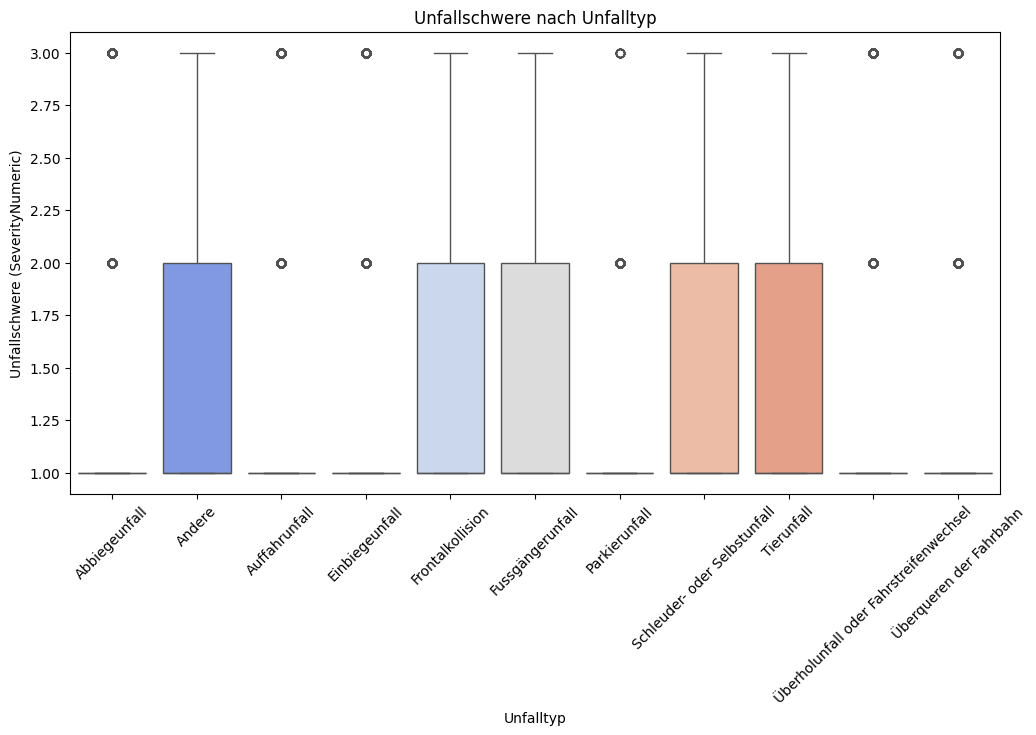

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='AccidentType', y='SeverityNumeric', palette='coolwarm')
plt.title("Unfallschwere nach Unfalltyp")
plt.xlabel("Unfalltyp")
plt.ylabel("Unfallschwere (SeverityNumeric)")
plt.xticks(rotation=45)
plt.show()


### Analyse von zeitlichen und geografischen Mustern

##### Analyse der Unfallschwere nach Unfallstunde


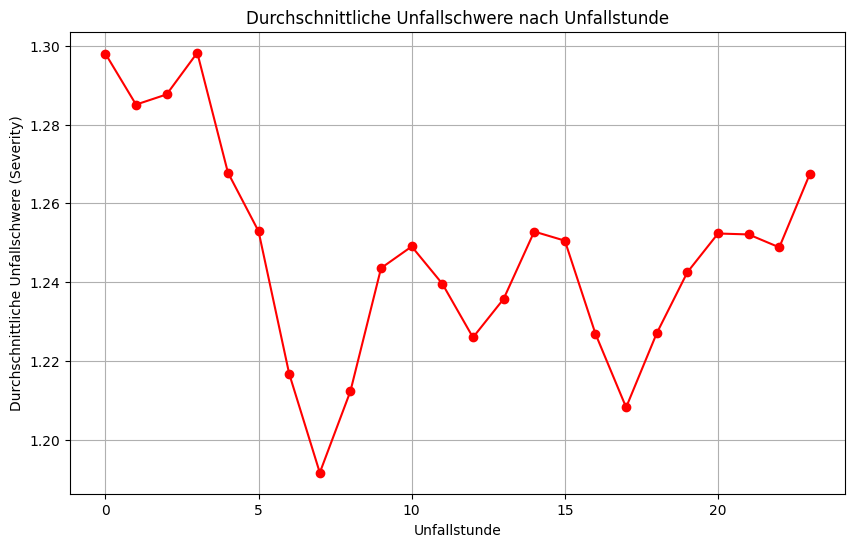

In [32]:
# Durchschnittliche Unfallschwere nach Unfallstunde
df_cleaned['AccidentHour'] = df_cleaned['AccidentDateTime'].dt.hour

hourly_severity = df_cleaned.groupby('AccidentHour').agg(
    avg_severity=('SeverityNumeric', 'mean')
)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(hourly_severity.index, hourly_severity['avg_severity'], marker='o', color='red')
plt.title('Durchschnittliche Unfallschwere nach Unfallstunde')
plt.xlabel('Unfallstunde')
plt.ylabel('Durchschnittliche Unfallschwere (Severity)')
plt.grid()
plt.show()



- **Beobachtungen**:
  - Die durchschnittliche Unfallschwere (`SeverityNumeric`) ist in den frühen Morgenstunden (0 bis 2 Uhr) am höchsten.
  - Nach einem Rückgang in den frühen Morgenstunden (ca. 5 bis 6 Uhr) bleibt die Schwere tagsüber relativ stabil.
  - Ab 22 Uhr steigt die durchschnittliche Schwere der Unfälle erneut an.

- **Interpretation**:
  - Die hohen Werte in der Nacht (0 bis 2 Uhr) könnten auf gefährliche Fahrbedingungen (z. B. Dunkelheit, Alkohol) oder geringeren Verkehr mit höherer Geschwindigkeit zurückzuführen sein.
  - Der Anstieg ab 22 Uhr könnte ebenfalls mit schlechter Sicht, Müdigkeit oder unvorsichtigerem Verhalten zusammenhängen.


##### Spezifische Unfallbedingungen in Kantonen mit hoher Schwere analysieren
Unfallbedingungen in Kantonen mit hoher Schwere

In [33]:
# Gruppierung nach Kanton, Straßentyp und Unfalltyp
canton_conditions = df_cleaned.groupby(['CantonCode', 'RoadType', 'AccidentType']).agg(
    avg_severity=('SeverityNumeric', 'mean'),
    frequency=('AccidentType', 'count')
).sort_values(by='avg_severity', ascending=False)

# Top 10 Kombinationen mit höchster durchschnittlicher Schwere
canton_conditions_top10 = canton_conditions.head(10)
print("Top 10 Kombinationen mit hoher Unfallschwere:\n", canton_conditions_top10)


Top 10 Kombinationen mit hoher Unfallschwere:
                                          avg_severity  frequency
CantonCode RoadType    AccidentType                             
AG         Autobahn    Tierunfall            3.000000          1
OW         Autobahn    Auffahrunfall         3.000000          1
TI         Autostrasse Fussgängerunfall      3.000000          1
GR         Autobahn    Fussgängerunfall      3.000000          1
BE         Autobahn    Fussgängerunfall      2.600000          5
TG         Autostrasse Frontalkollision      2.500000          4
VS         Nebenanlage Fussgängerunfall      2.500000          2
GE         Autobahn    Fussgängerunfall      2.500000          4
SG         Autobahn    Fussgängerunfall      2.500000          4
FR         Autobahn    Frontalkollision      2.333333          3


C:\Users\Admin\AppData\Local\Temp\ipykernel_6752\681564363.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  canton_conditions = df_cleaned.groupby(['CantonCode', 'RoadType', 'AccidentType']).agg(


Die Ergebnisse der Analyse zeigen die **Top 10 Kombinationen** von Kanton, Straßentyp und Unfalltyp mit der höchsten durchschnittlichen Unfallschwere:

**Herausstechende Observationen**
1. **Tierunfälle auf Nebenstraßen (AI, JU)**:
   - Obwohl selten, haben Tierunfälle in diesen Regionen eine hohe Schwere.
   - Präventive Maßnahmen könnten hier effektiv sein, wie z. B. bessere Beschilderungen oder Tierwarnsysteme.

2. **Fussgängerunfälle auf Autobahnen (ZG, SO)**:
   - Sehr ungewöhnlich, aber mit extrem hoher Schwere.
   - Solche Vorfälle könnten durch klare Trennung von Fußgängern und Autobahnen oder verbesserte Absicherung reduziert werden.

3. **Parkierunfälle auf Autobahnen (VS)**:
   - Dies könnte auf ungesicherte Pannenstreifen oder riskantes Verhalten hinweisen.
   - Maßnahmen könnten verbesserte Parkverbote und Kontrollen auf Autobahnen sein.

##### Analyse der Unfallschwere nach Kanton

C:\Users\Admin\AppData\Local\Temp\ipykernel_6752\1171816636.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  canton_severity = df_cleaned.groupby('CantonCode').agg(
C:\Users\Admin\AppData\Local\Temp\ipykernel_6752\1171816636.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=canton_severity.index, y=canton_severity['avg_severity'], palette='coolwarm')


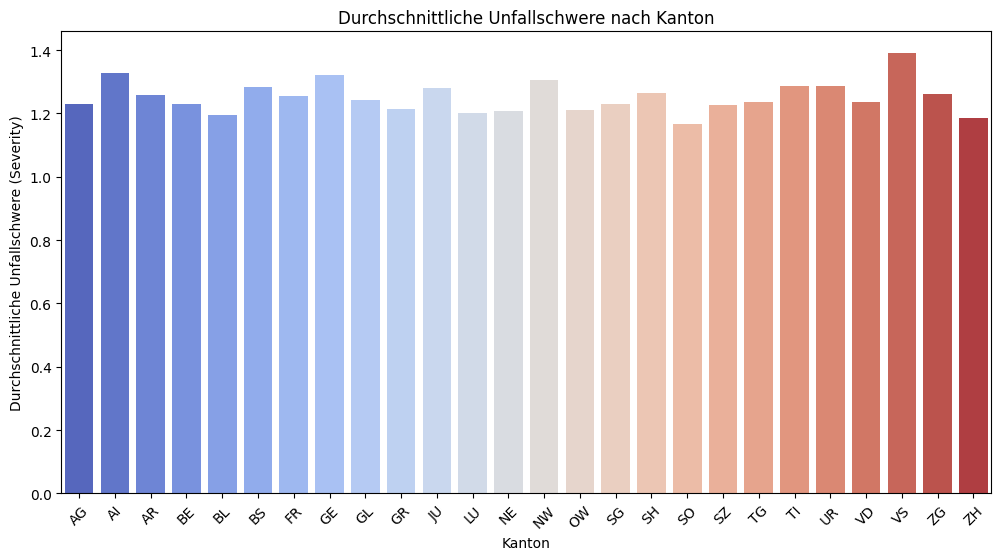

In [34]:
# Durchschnittliche Unfallschwere nach Kanton
canton_severity = df_cleaned.groupby('CantonCode').agg(
    avg_severity=('SeverityNumeric', 'mean')
).sort_values(by='avg_severity', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=canton_severity.index, y=canton_severity['avg_severity'], palette='coolwarm')
plt.title('Durchschnittliche Unfallschwere nach Kanton')
plt.xlabel('Kanton')
plt.ylabel('Durchschnittliche Unfallschwere (Severity)')
plt.xticks(rotation=45)
plt.show()


- **Beobachtungen**:
  - Kantone wie Wallis (VS), Zug (ZG), und Tessin (TI) haben die höchste durchschnittliche Unfallschwere.
  - Kantone mit großen Städten wie Zürich (ZH), Bern (BE) oder Basel-Stadt (BS) haben eine vergleichsweise geringere durchschnittliche Schwere, obwohl die Unfallzahlen hoch sind.

- **Interpretation**:
  - Regionen mit hoher Schwere könnten ländlicher sein, wo höhere Geschwindigkeiten oder schlechtere Straßenbedingungen vorherrschen.
  - In städtischen Gebieten gibt es tendenziell mehr Unfälle, aber diese führen oft zu leichteren Verletzungen, möglicherweise aufgrund geringerer Geschwindigkeiten und besserer medizinischer Versorgung.

##### Unfalltypen und deren Verteilung nach Unfallzeit analysieren


C:\Users\Admin\AppData\Local\Temp\ipykernel_6752\1922724239.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_accidents = df_cleaned.groupby(['AccidentHour', 'AccidentType']).agg(


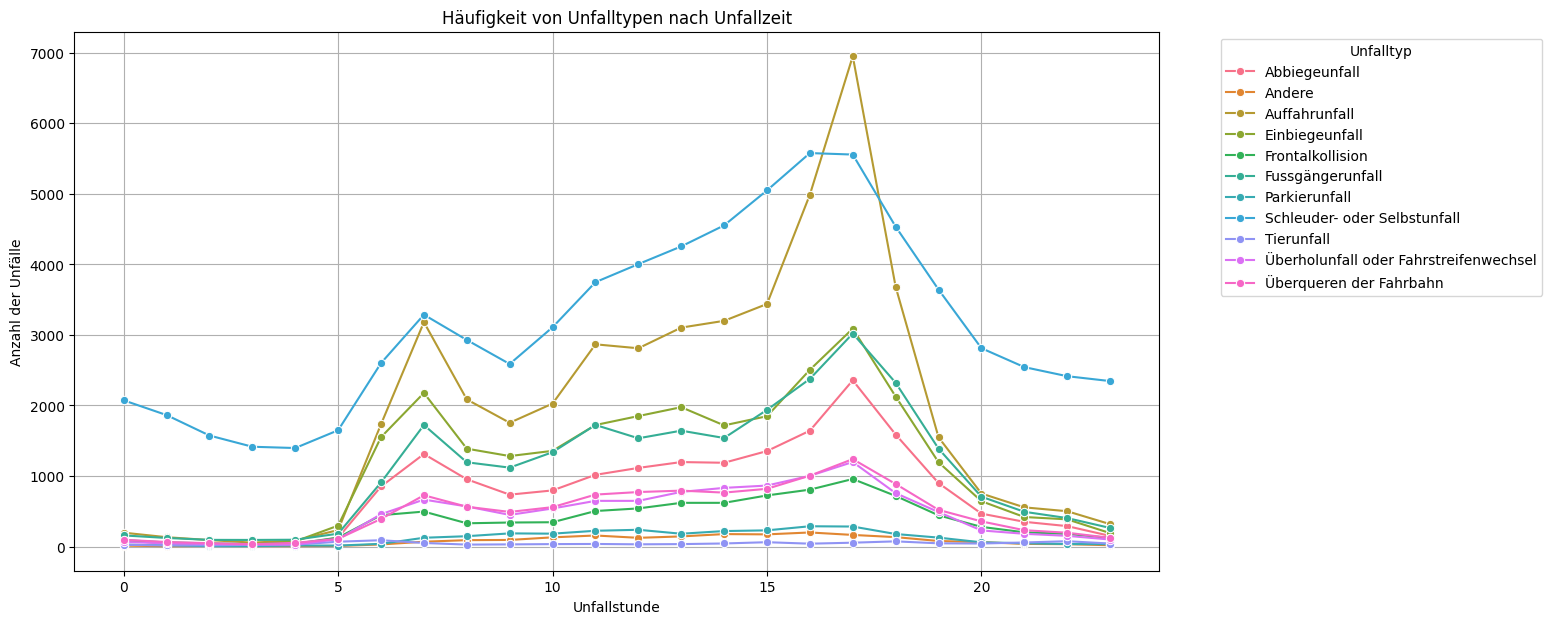

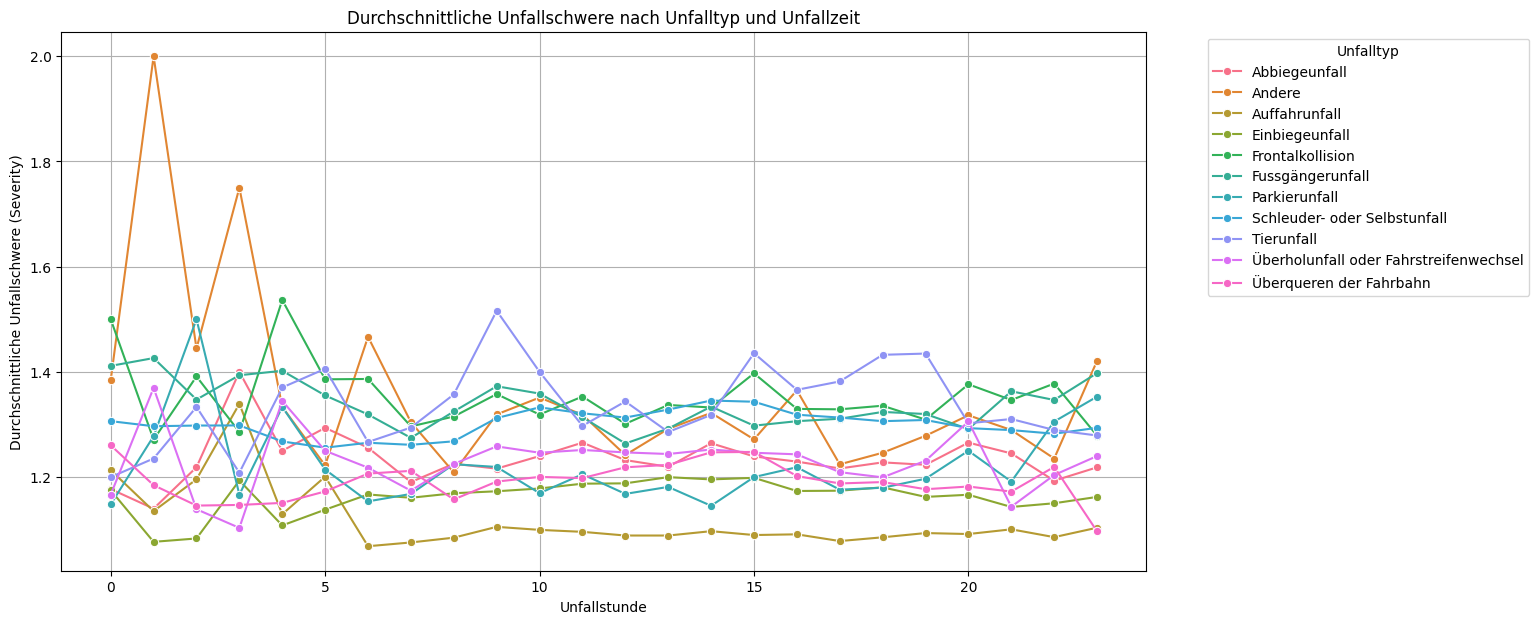

In [35]:
# Gruppierung nach Stunde und Unfalltyp
hourly_accidents = df_cleaned.groupby(['AccidentHour', 'AccidentType']).agg(
    avg_severity=('SeverityNumeric', 'mean'),
    frequency=('AccidentType', 'count')
).reset_index()

# Visualisierung: Häufigkeit bestimmter Unfalltypen nach Stunde
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
sns.lineplot(data=hourly_accidents, x='AccidentHour', y='frequency', hue='AccidentType', marker='o')
plt.title('Häufigkeit von Unfalltypen nach Unfallzeit')
plt.xlabel('Unfallstunde')
plt.ylabel('Anzahl der Unfälle')
plt.legend(title='Unfalltyp', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

# Visualisierung: Schwere bestimmter Unfalltypen nach Stunde
plt.figure(figsize=(14, 7))
sns.lineplot(data=hourly_accidents, x='AccidentHour', y='avg_severity', hue='AccidentType', marker='o')
plt.title('Durchschnittliche Unfallschwere nach Unfalltyp und Unfallzeit')
plt.xlabel('Unfallstunde')
plt.ylabel('Durchschnittliche Unfallschwere (Severity)')
plt.legend(title='Unfalltyp', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


##### Interpretation der Visualisierungen

**1. Häufigkeit von Unfalltypen nach Unfallzeit (Diagramm 1)**

  - **Auffahrunfälle** sind tagsüber (insbesondere zwischen 7 Uhr und 18 Uhr) am häufigsten und erreichen ihren Höhepunkt gegen 16 Uhr.
  - **Schleuder- oder Selbstunfälle** sind ebenfalls tagsüber häufig, jedoch mit einer etwas gleichmäßigeren Verteilung.
  - **Fussgängerunfälle** treten überwiegend morgens und nachmittags (z. B. 7 Uhr und 15-17 Uhr) auf.
  - Seltenere Unfalltypen wie **Tierunfälle** oder **Parkierunfälle** haben keine klare zeitliche Verteilung.

- **Interpretation**:
  - Auffahrunfälle korrelieren wahrscheinlich mit hohem Verkehrsaufkommen während der Pendelzeiten.
  - Schleuder- und Selbstunfälle sind möglicherweise weniger stark an spezifische Zeiten gebunden, da sie oft durch Fahrfehler oder schlechte Wetterbedingungen ausgelöst werden.
  - Fussgängerunfälle treten zu Zeiten auf, in denen Fußgänger typischerweise unterwegs sind (z. B. Schulbeginn oder Feierabendverkehr).

- **Empfehlung**:
  - Verstärkte Verkehrsüberwachung und Maßnahmen zur Entschärfung von Auffahrunfällen während der Hauptverkehrszeiten.
  - Verbesserte Straßenbedingungen und Wetterwarnungen könnten Schleuder- und Selbstunfälle reduzieren.

---

**2. Durchschnittliche Unfallschwere nach Unfalltyp und Unfallzeit (Diagramm 2)**

- **Beobachtungen**:
  - **Tierunfälle** und **Fussgängerunfälle** haben zu bestimmten Zeiten (z. B. nachts oder früh morgens) die höchste durchschnittliche Schwere.
  - Die Schwere von **Auffahrunfällen** bleibt relativ konstant und gering.
  - **Schleuder- oder Selbstunfälle** zeigen tagsüber leicht erhöhte Schwerewerte.
  - Weniger häufige Unfalltypen wie **Frontalkollisionen** oder **Parkierunfälle** haben gelegentlich Spitzenwerte bei der Schwere, sind jedoch aufgrund der geringen Häufigkeit weniger verlässlich.

- **Interpretation**:
  - Tierunfälle und Fussgängerunfälle in den frühen Morgenstunden könnten mit Dunkelheit oder schlechter Sicht zusammenhängen, was ihre Schwere erklärt.
  - Die niedrige Schwere von Auffahrunfällen bestätigt, dass sie überwiegend bei geringen Geschwindigkeiten im Stadtverkehr auftreten.

- **Empfehlung**:
  - Maßnahmen zur Prävention schwerer Tierunfälle (z. B. Wildwarnsysteme) und Schutzmaßnahmen für Fußgänger (z. B. bessere Beleuchtung).
  - Unfalltypen mit hohen Schwerewerten sollten in der Modellierung priorisiert werden.

#### Fazit der geografischen und Zeitlichen Merkmale

1. **Fokus auf schwerwiegende Unfalltypen**:
   - Wir priorisieren Unfalltypen wie **Tierunfälle**, **Fussgängerunfälle** und **Frontalkollisionen**, da sie eine besonders hohe Schwere aufweisen.
   - Wir bestimmen, welche Straßentypen oder Regionen mit diesen Unfalltypen verbunden sind, um gezielte Maßnahmen abzuleiten.

2. **Integration in die Modellierung**:
   - Wir nutzen die gewonnenen Erkenntnisse aus den Analysen, um relevante Merkmale wie `AccidentType`, `RoadType`, `AccidentHour` und `CantonCode` in den Machine-Learning-Prozess zu integrieren.
   - Diese Merkmale dienen als Schlüsselvariablen für die Vorhersage der Unfallschwere.

3. **Erweiterte Analyse von Regionen und Straßenbedingungen**:
   - Wir ergänzen unsere Analysen durch räumliche Visualisierungen, um geografische Muster zu erkennen und Regionen mit besonders hohem Risiko zu identifizieren.
   - Diese Erkenntnisse helfen uns, präzise Präventionsstrategien für spezifische Gebiete zu entwickeln.

#### Durchschnittliche Unfallschwere im Zeitverlauf

C:\Users\Admin\AppData\Local\Temp\ipykernel_6752\1214901117.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_time_series = df_cleaned.resample('Y', on='AccidentDateTime')['SeverityNumeric'].mean().reset_index()


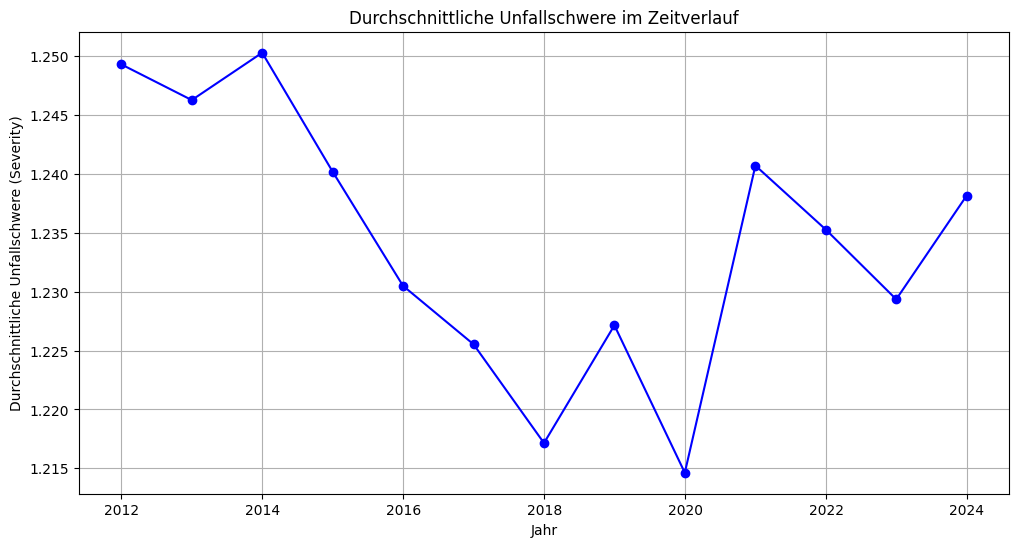

In [36]:

# Konvertiere AccidentDateTime sicherheitshalber in datetime-Format
df_cleaned['AccidentDateTime'] = pd.to_datetime(df_cleaned['AccidentDateTime'])

# Gruppierung der Daten nach Jahr und Berechnung des Durchschnitts der Schwere
df_time_series = df_cleaned.resample('Y', on='AccidentDateTime')['SeverityNumeric'].mean().reset_index()

# Umbenennung für Klarheit
df_time_series.rename(columns={'AccidentDateTime': 'Year', 'SeverityNumeric': 'AvgSeverity'}, inplace=True)

# Plotten der Zeitreihe
plt.figure(figsize=(12, 6))
plt.plot(df_time_series['Year'], df_time_series['AvgSeverity'], marker='o', linestyle='-', color='blue')
plt.title("Durchschnittliche Unfallschwere im Zeitverlauf")
plt.xlabel("Jahr")
plt.ylabel("Durchschnittliche Unfallschwere (Severity)")
plt.grid(True)
plt.show()


#### Untersuchung der Trends

C:\Users\Admin\AppData\Local\Temp\ipykernel_6752\4056959507.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_series = df_cleaned.resample('M', on='AccidentDateTime')['SeverityNumeric'].mean().reset_index()


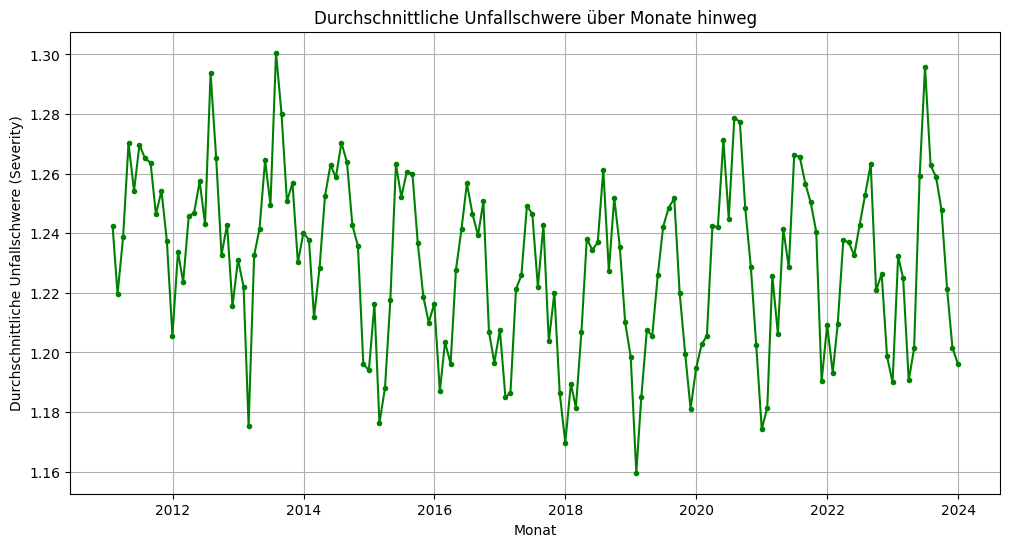

In [37]:
# Gruppierung der Daten nach Monat und Berechnung des Durchschnitts der Schwere
df_monthly_series = df_cleaned.resample('M', on='AccidentDateTime')['SeverityNumeric'].mean().reset_index()

# Umbenennung für Klarheit
df_monthly_series.rename(columns={'AccidentDateTime': 'Month', 'SeverityNumeric': 'AvgSeverity'}, inplace=True)

# Plotten der Zeitreihe für Monate
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_series['Month'], df_monthly_series['AvgSeverity'], marker='.', linestyle='-', color='green')
plt.title("Durchschnittliche Unfallschwere über Monate hinweg")
plt.xlabel("Monat")
plt.ylabel("Durchschnittliche Unfallschwere (Severity)")
plt.grid(True)
plt.show()


#### Fazit der Resultate über den Zeitverlauf
1. **Jahresweise Entwicklung**:
   - Die durchschnittliche Unfallschwere scheint im Laufe der Jahre Schwankungen zu zeigen.
   - Es gibt deutliche Rückgänge zwischen den Jahren 2015 bis 2018, gefolgt von einem Anstieg nach 2020.
   - Solche Veränderungen könnten auf Verkehrssicherheitsinitiativen, Änderungen im Verkehrsgesetz oder saisonale Einflüsse zurückzuführen sein.

2. **Monatliche Trends**:
   - Die monatlichen Schwankungen zeigen eine ausgeprägte Variabilität, was auf saisonale Einflüsse hinweisen könnte (z. B. Wintermonate, in denen Unfälle durch schlechte Witterungsbedingungen schwerwiegender sein könnten).
   - Auch Spitzen in der Schwere könnten mit besonderen Ereignissen (z. B. Ferienverkehr oder besonderen Witterungsbedingungen) korrelieren.

In [38]:
##df_cleaned.to_excel("data/df_cleaned_afteranalysis.xlsx", index=False)

##  Feature Selection & Engineering

**Nächste Schritte gemäss ChatGPT:** @Martin

#### **Schlussfolgerungen für "Feature Selection & Engineering" basierend auf den Ergebnissen:**

Die bisherigen Analysen und Visualisierungen bieten wichtige Hinweise darauf, wie Sie den Prozess der Feature Selection und Engineering gestalten können:

---

#### **1. Identifikation der wichtigsten erklärenden Variablen (Features):**
Basierend auf den bisherigen Ergebnissen sollten Sie folgende Variablen priorisieren, da sie potenziell starke Korrelationen oder Kausalzusammenhänge mit der Unfallschwere aufweisen:

- **Unfalltyp (AccidentType):** Bestimmte Unfalltypen (z. B. Tierunfälle, Frontalkollisionen, Schleuder- oder Selbstunfälle) sind häufiger mit schwereren Unfällen verbunden.
- **Straßentyp (RoadType):** Die Art der Straße (z. B. Autobahn, Nebenstraße) beeinflusst die Schwere erheblich.
- **Kanton (CantonCode):** Einige Kantone weisen signifikant höhere durchschnittliche Schwerewerte auf.
- **Unfallzeit (AccidentHour):** Zeitliche Muster zeigen, dass schwere Unfälle zu bestimmten Tageszeiten häufiger auftreten.
- **Geografische Koordinaten (AccidentLocation_CHLV95_E, AccidentLocation_CHLV95_N):** Diese können als Features verwendet werden, um regionale Unterschiede zu modellieren.
- **Monat und Jahr:** Zeitliche Trends (monatliche und jährliche Schwankungen) könnten Hinweise auf saisonale oder langfristige Einflüsse liefern.

#### **2. Optimierung der Datengrundlage:**
- **Kategorische Variablen kodieren:**
  - Konvertieren Sie kategorische Variablen wie `AccidentType`, `RoadType`, `CantonCode`, `AccidentWeekDay` in numerische Formate (z. B. One-Hot-Encoding oder Label-Encoding).
  

In [50]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import spearmanr

# List of categorical columns
categorical_cols = ['AccidentType', 'RoadType', 'CantonCode','AccidentWeekDay']
results = {}

# Initialize LabelEncoder
encoder = LabelEncoder()

# Encode the AccidentSeverityCategory column
df_cleaned['AccidentSeverityCategory_Encoded'] = encoder.fit_transform(df_cleaned['AccidentSeverityCategory'])

# Iterate over each categorical column
for col in categorical_cols:
    # Encode the categorical column
    df_cleaned[f'{col}_Encoded'] = encoder.fit_transform(df_cleaned[col])
    
    # Calculate Spearman correlation and p-value with AccidentSeverityCategory_Encoded
    spearman_corr, p_value = spearmanr(df_cleaned[f'{col}_Encoded'], df_cleaned['AccidentSeverityCategory_Encoded'])
    
    # Store results in a dictionary
    results[col] = {'Spearman Correlation': spearman_corr, 'P-value': p_value}

# Display the results for all categorical columns
print("Spearman Correlation Results with AccidentSeverityCategory_Encoded:")
for col, metrics in results.items():
    print(f"{col}: Correlation = {metrics['Spearman Correlation']}, P-value = {metrics['P-value']}")



Spearman Correlation Results with AccidentSeverityCategory_Encoded:
AccidentType: Correlation = 0.09535296541438423, P-value = 0.0
RoadType: Correlation = 0.08111095276224531, P-value = 0.0
CantonCode: Correlation = -0.015945036121132697, P-value = 1.5227299107707583e-14
AccidentWeekDay: Correlation = 0.026360028214372, P-value = 5.400092242126118e-37


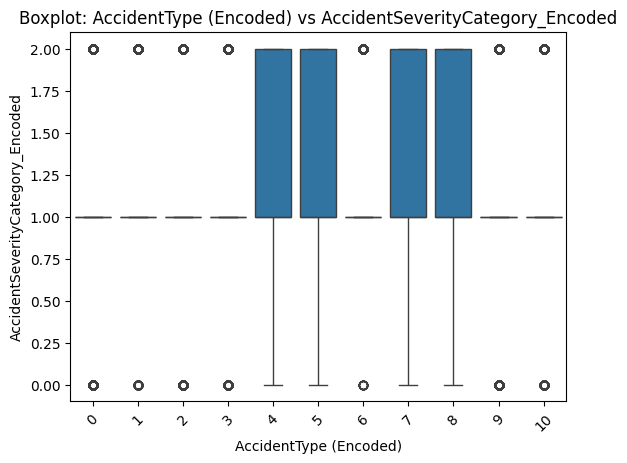

In [51]:
sns.boxplot(data=df_cleaned, x='AccidentType_Encoded', y='AccidentSeverityCategory_Encoded')
plt.title("Boxplot: AccidentType (Encoded) vs AccidentSeverityCategory_Encoded")
plt.xlabel("AccidentType (Encoded)")
plt.ylabel("AccidentSeverityCategory_Encoded")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


In [52]:
# Initialize LabelEncoder for AccidentType
accident_type_encoder = LabelEncoder()
df_cleaned['AccidentType_Encoded'] = accident_type_encoder.fit_transform(df_cleaned['AccidentType'])

# Generate the mapping for AccidentType
accident_type_mapping = dict(zip(accident_type_encoder.transform(accident_type_encoder.classes_), accident_type_encoder.classes_))

# Display the original accident types for encoded values 4, 5, 7, and 8
print("Mapping for AccidentType Encoded Values:")
for encoded_value in [4, 5, 7, 8]:
    print(f"Encoded Value {encoded_value}: {accident_type_mapping.get(encoded_value)}")


Mapping for AccidentType Encoded Values:
Encoded Value 4: Frontalkollision
Encoded Value 5: Fussgängerunfall
Encoded Value 7: Schleuder- oder Selbstunfall
Encoded Value 8: Tierunfall


In [41]:
# Calculate Spearman correlation for AccidentHour and SeverityNumeric
spearman_corr, p_value = spearmanr(df_cleaned['AccidentHour'], df_cleaned['SeverityNumeric'])

# Display the results
print(f"Spearman Correlation (AccidentHour vs SeverityNumeric): {spearman_corr}")
print(f"P-value: {p_value}")

Spearman Correlation (AccidentHour vs SeverityNumeric): 0.0013880707429849942
P-value: 0.5034849005380522


- **Cluster-Analyse für geografische Daten:**
  - Führen Sie eine Cluster-Analyse basierend auf `AccidentLocation_CHLV95_E` und `AccidentLocation_CHLV95_N` durch, um geografische Gruppen oder Unfall-Hotspots zu identifizieren.

Zentroiden der Cluster:
[[2728685.33934246 1131284.73646501]
 [2702659.84624885 1247789.20002314]
 [2528382.25351278 1136201.83640906]
 [2640077.58500389 1239194.54366744]
 [2594054.89906517 1194569.17261222]]


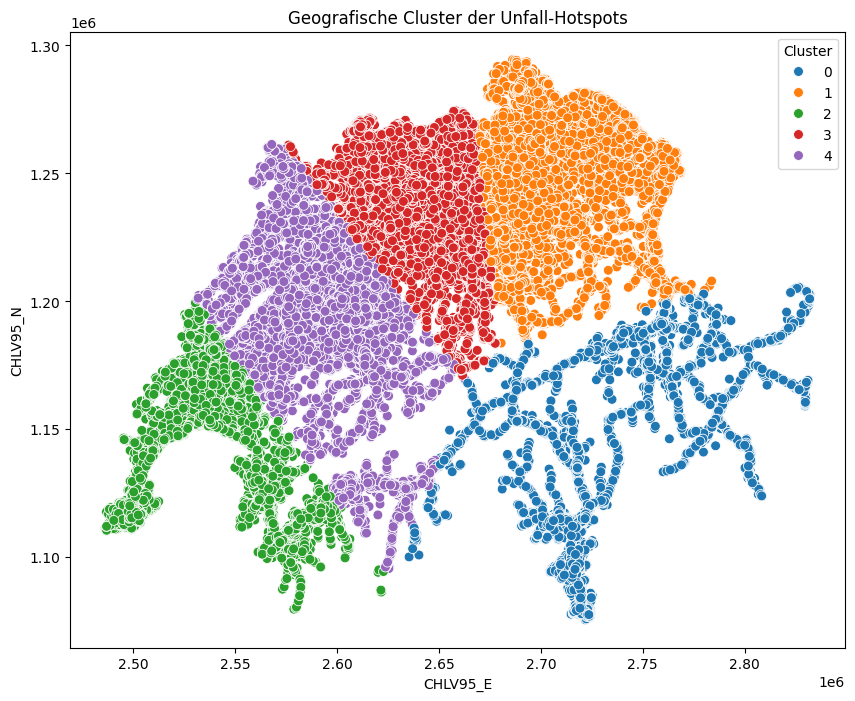

In [59]:
from sklearn.cluster import KMeans

geo_data = df_cleaned[['AccidentLocation_CHLV95_E', 'AccidentLocation_CHLV95_N']].dropna()

# Definiere die Anzahl der Cluster (z.B. 5)
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Führe Clustering durch
geo_data['Cluster'] = kmeans.fit_predict(geo_data)

# Zentroiden der Cluster anzeigen
print("Zentroiden der Cluster:")
print(kmeans.cluster_centers_)

# Streudiagramm der Cluster
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=geo_data['AccidentLocation_CHLV95_E'],
    y=geo_data['AccidentLocation_CHLV95_N'],
    hue=geo_data['Cluster'],
    palette='tab10',
    s=50
)
plt.title('Geografische Cluster der Unfall-Hotspots')
plt.xlabel('CHLV95_E')
plt.ylabel('CHLV95_N')
plt.legend(title='Cluster')
plt.show()

In [60]:
# Count the number of points in each cluster
cluster_counts = geo_data['Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Count']

# Display the count for each cluster
print("Number of points in each cluster:")
print(cluster_counts)

Number of points in each cluster:
   Cluster  Count
0        1  77658
1        3  51519
2        4  45393
3        2  40432
4        0  17301


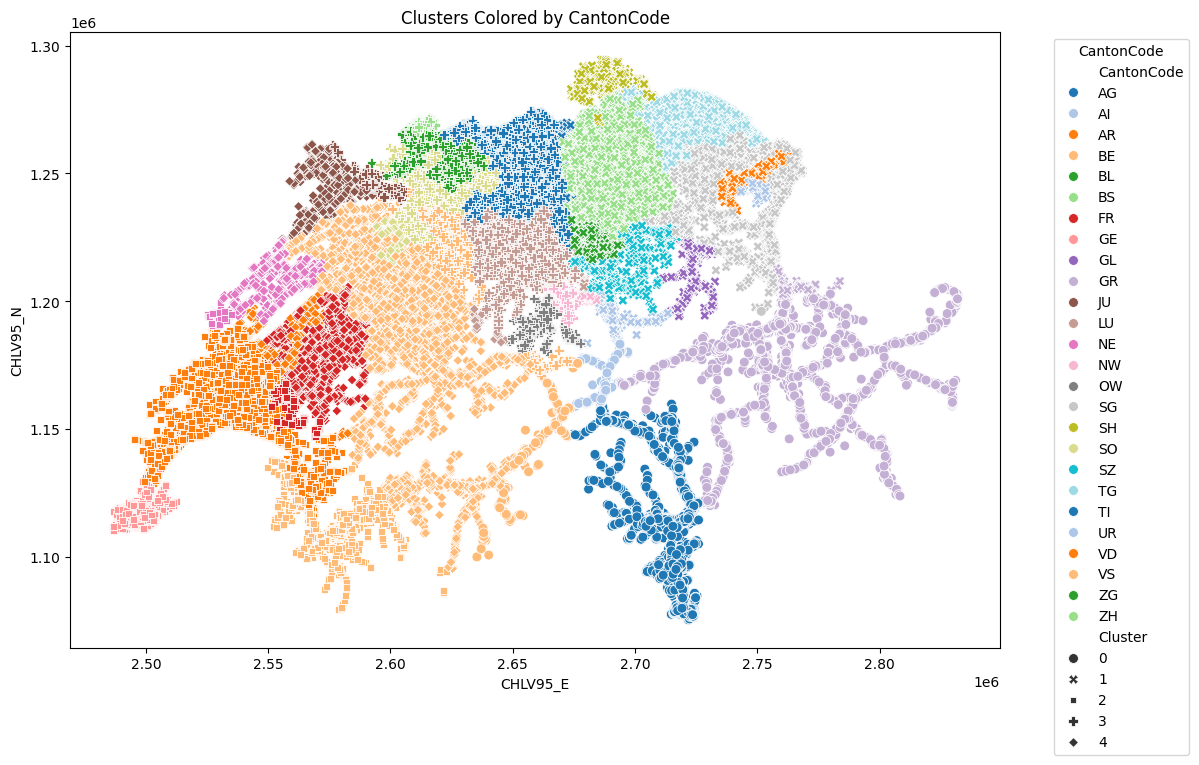

In [61]:
# Merge CantonCode into the geographic data with cluster labels
geo_data_with_canton = geo_data.copy()
geo_data_with_canton['CantonCode'] = df_cleaned['CantonCode']

# Plot clusters with CantonCode colors
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=geo_data_with_canton['AccidentLocation_CHLV95_E'],
    y=geo_data_with_canton['AccidentLocation_CHLV95_N'],
    hue=geo_data_with_canton['CantonCode'],  # Use CantonCode for colors
    style=geo_data_with_canton['Cluster'],  # Different styles for each cluster
    palette='tab20',  # Adjust the palette as needed
    s=50
)
plt.title('Clusters Colored by CantonCode')
plt.xlabel('CHLV95_E')
plt.ylabel('CHLV95_N')
plt.legend(title='CantonCode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [63]:
cluster_counts = geo_data_with_canton['Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Count']

cluster_counts

,Cluster,Count
0,1,77658
1,3,51519
2,4,45393
3,2,40432
4,0,17301


In [ ]:
# Bar plot to visualize the cluster counts
plt.figure(figsize=(8, 6))
sns.barplot(data=cluster_counts, x='Cluster', y='Count', palette='tab10')
plt.title('Number of Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


- **Feature-Engineering für zeitliche Variablen:**
  - Extrahieren Sie zusätzliche zeitliche Features aus `AccidentDateTime`:
    - **Jahreszeit** (Sommer, Winter etc.)
    - **Arbeitstag/Wochenende**
    - **Ferientage/Feiertage**
  
- **Interaktionen zwischen Features:**
  - Berücksichtigen Sie Kombinationen von Variablen wie `AccidentType` und `RoadType`, die zusammen einen stärkeren Einfluss auf die Schwere haben könnten.

---

#### **3. Analyse der Korrelationen und Kausalitäten:**
- **Korrelationstests:**
  - Berechnen Sie die Korrelationen zwischen den numerischen Features (z. B. Unfallzeit, Schweregrad, geografische Daten).
  - Nutzen Sie Chi-Quadrat-Tests für kategorische Variablen (z. B. `AccidentType` und `AccidentSeverityCategory`).
  
- **Kausalzusammenhänge identifizieren:**
  - Verwenden Sie Techniken wie "Causal Impact Analysis" oder "Granger Causality", um potenzielle kausale Beziehungen zwischen den Features und der Schwere zu validieren.

---

#### **4. Feature-Engineering für ML-Modelle:**
- **Skalierung:**
  - Skalieren Sie numerische Variablen wie `AccidentHour`, `AccidentLocation_CHLV95_E`, und `AccidentLocation_CHLV95_N`, um deren Einfluss zu normalisieren.
  
- **Feature-Importance-Analyse:**
  - Nach dem Training erster Machine-Learning-Modelle können Sie Feature-Importance-Methoden (z. B. Shapley-Werte, Permutations-Importances) verwenden, um die wichtigsten erklärenden Variablen zu identifizieren und die Datengrundlage entsprechend zu optimieren.

---

#### **5. Nächste Schritte:**
1. **Feature-Engineering vorbereiten:**
   - Kodieren und transformieren Sie die identifizierten Variablen gemäß den oben genannten Empfehlungen.
   
2. **Vorläufiges Modelltraining:**
   - Trainieren Sie ein einfaches Modell (z. B. Entscheidungsbaum, Random Forest), um die anfängliche Feature-Bedeutung zu validieren.
   
3. **Iterative Optimierung:**
   - Optimieren Sie die Feature-Auswahl basierend auf der Performance der Modelle und validieren Sie die Wichtigkeit neuer Features.

Mit diesen Schritten können Sie eine robuste Grundlage schaffen, um den Schweregrad von Unfällen präzise vorherzusagen und die entscheidenden Einflussfaktoren zu verstehen.

## Anwendung in Machine Learning

Blablabla

## Anwendung von XAI – Techniken

Blablabla